# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import zscore




## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [5]:
df.shape

(3454, 15)

In [6]:
df.duplicated().sum()


0

In [7]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Based on the statistical summary, We can see that many columns may be skewed in data. We are seeing normal distribution patterns when it comes to the used price and the new price.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

I can see missing data in "main_camera_mp", "selfie_camera_mp", "int_memory", "ram","battery" and "weight". There are quiet a few object categories that we will need to explore later. After exploring the data, brand names can possibly be omitted. After taking a look at the description of ram data, I am seeing that most of the phones possees 4 GB of ram.

In [10]:
df['ram'].unique()

array([ 3.  ,  8.  ,  6.  ,  4.  ,  2.  ,  1.  , 12.  ,  0.5 ,  0.25,
        0.03,   nan,  0.02,  1.5 ])

In [11]:
RAM_counts = df['ram'].value_counts()
print(RAM_counts)

ram
4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.02       18
0.03       17
0.50        9
1.50        1
Name: count, dtype: int64


In [12]:
# Count the number of NaN values in the 'ram' column
nan_count = df['ram'].isnull().sum()
print("Number of NaN values in 'ram' column:", nan_count)

Number of NaN values in 'ram' column: 4


Most phones do posses 4 GB of RAM. I am going to update nan values in ram to have 4 GB

In [13]:
# Change NaN values in the 'ram' column to 4
df['ram'].fillna(4, inplace=True)

<ipython-input-13-a4d6f481b154>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ram'].fillna(4, inplace=True)


When it comes to handling the missing values in selfie megapixels, int memory, battery and weight- we have decided to delete these nan values since they are such a small percentage of the data.


In [14]:
# Delete rows with NaN values in the specified columns
columns_to_check = ['int_memory', 'selfie_camera_mp', 'battery', 'weight']
df.dropna(subset=columns_to_check, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3435 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3435 non-null   object 
 1   os                     3435 non-null   object 
 2   screen_size            3435 non-null   float64
 3   4g                     3435 non-null   object 
 4   5g                     3435 non-null   object 
 5   main_camera_mp         3256 non-null   float64
 6   selfie_camera_mp       3435 non-null   float64
 7   int_memory             3435 non-null   float64
 8   ram                    3435 non-null   float64
 9   battery                3435 non-null   float64
 10  weight                 3435 non-null   float64
 11  release_year           3435 non-null   int64  
 12  days_used              3435 non-null   int64  
 13  normalized_used_price  3435 non-null   float64
 14  normalized_new_price   3435 non-null   float64
dtypes: float6

Through this sanity check, we have successfull cleaned the data for much of the missing values. However, as we will soon learn, there are 179 entries nan values still present in the data set. This represents .52% of the dataset.

As we further explore the data in the 'main_camera_mp' we notice that there are a few critical points that may have influence in skewing the data.

Since the 'main_camera_mg' is right skewed, we have chosen to replace the values with the median after recalculating the statsitical summary.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='main_camera_mp'>

Text(0.5, 0, 'Main Camera MP')

Text(0.5, 1.0, 'Boxplot of Main Camera MP')

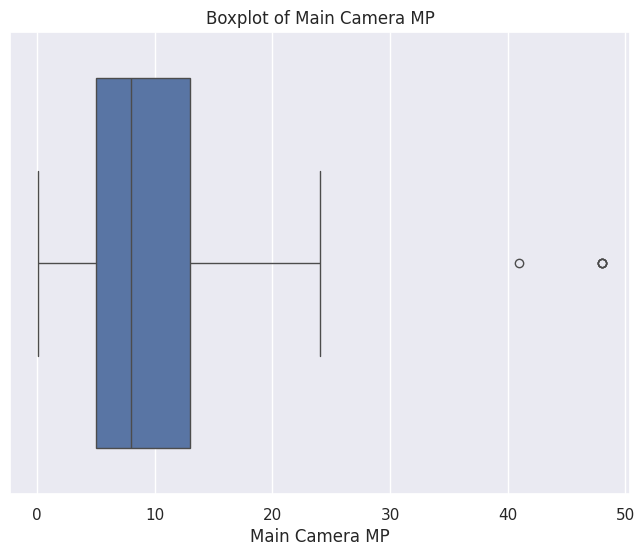

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['main_camera_mp'])
plt.xlabel('Main Camera MP')
plt.title('Boxplot of Main Camera MP')
plt.show()

In [17]:
df['main_camera_mp'].unique()

array([13.  ,  8.  ,  5.  , 10.5 ,  3.15,   nan,  2.  , 16.  ,  0.3 ,
       12.  , 14.5 , 48.  ,  3.  , 21.  ,  1.3 , 13.1 , 24.  ,  0.08,
       20.7 , 23.  ,  1.  , 18.  , 12.2 , 12.3 , 20.  , 20.2 ,  4.  ,
       12.5 , 10.  ,  6.5 ,  6.7 , 41.  , 20.1 , 12.6 , 16.3 , 22.6 ,
       19.  , 21.5 , 21.2 ,  8.1 ,  1.2 , 22.5 ])

In [18]:
MAIN_mg_counts = df['main_camera_mp'].value_counts()
print(MAIN_mg_counts)

main_camera_mp
13.00    1033
8.00      751
5.00      541
12.00     189
2.00      171
16.00     154
3.15      122
0.30       65
10.50      30
1.30       26
23.00      19
21.00      19
20.70      14
20.00      13
14.50      13
4.00       10
12.20      10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
12.50       4
48.00       4
6.50        4
6.70        4
21.20       2
21.50       1
1.20        1
16.30       1
22.60       1
18.00       1
12.60       1
20.10       1
41.00       1
20.20       1
1.00        1
0.08        1
22.50       1
Name: count, dtype: int64


In [19]:
nan_count = df['main_camera_mp'].isnull().sum()
print(nan_count)

179


In [20]:
# Drop rows where 'main_camera_mp' is equal to 41 or 48 which are our obvious outliers
df = df[(df['main_camera_mp'] != 41) & (df['main_camera_mp'] != 48)]

# Reset index if needed
df.reset_index(drop=True, inplace=True)

In order to receive a more accurate mean and median, we have decided to drop our two very obvious outliers in the data set that were refelcted in the boxplot for 'main_camera_mp'. This only changed the mean slightly, but the median is unchanged.

In [21]:
summary = df['main_camera_mp'].describe()
print(summary)

count    3251.000000
mean        9.412236
std         4.582234
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        24.000000
Name: main_camera_mp, dtype: float64


Since the mean of the main camera mg is greater than the median, we can assume that the megapixels of the main camera are likely right skewed.

In [22]:
# Change NaN values in the 'ram' column to 4
df['main_camera_mp'].fillna(8, inplace=True)

<ipython-input-22-9d35206402c7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['main_camera_mp'].fillna(8, inplace=True)
<ipython-input-22-9d35206402c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_camera_mp'].fillna(8, inplace=True)


In [23]:
# Check if there are any missing values in the dataset
missing_values = df.isnull().any().any()

if missing_values:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")


There are no missing values in the dataset.


All nan values are handled!

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

<Axes: xlabel='selfie_camera_mp', ylabel='Count'>

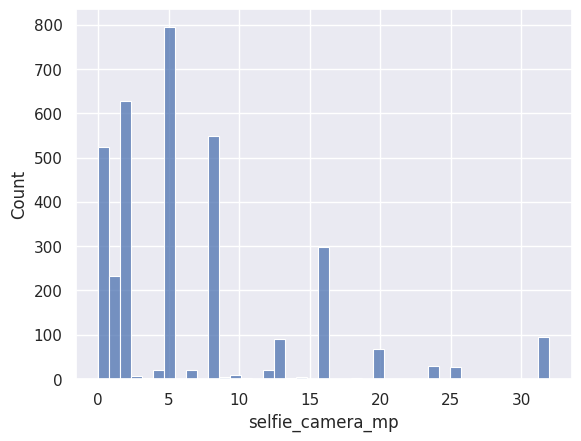

<Axes: xlabel='selfie_camera_mp'>

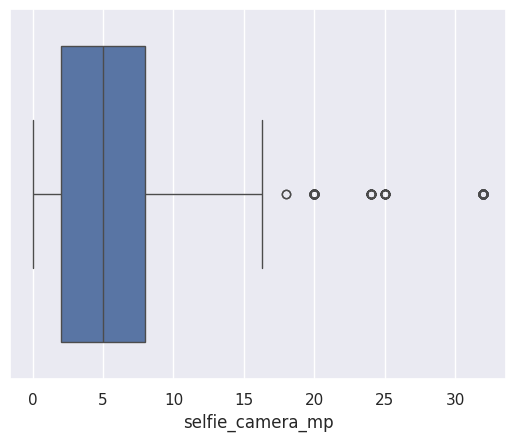

<Axes: xlabel='selfie_camera_mp', ylabel='count'>

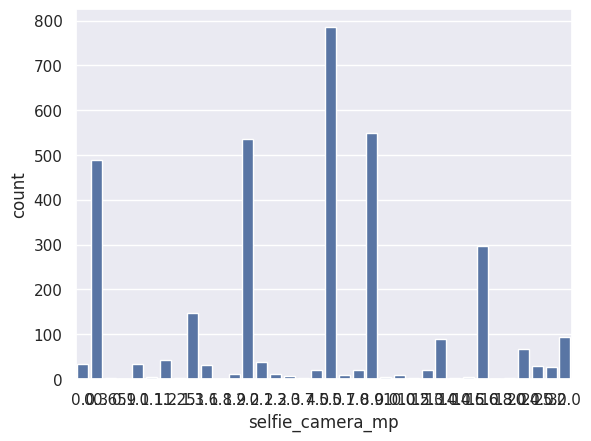

<Axes: xlabel='int_memory', ylabel='Count'>

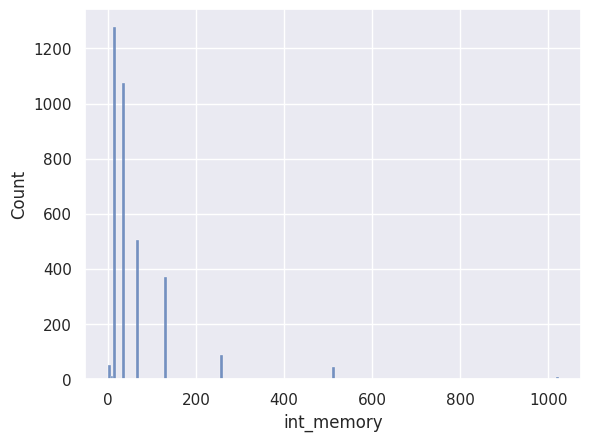

<Axes: xlabel='int_memory'>

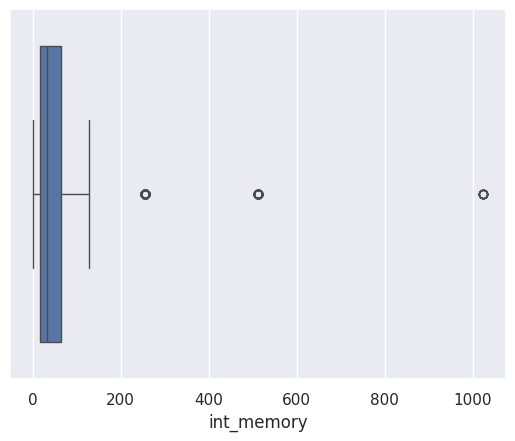

<Axes: xlabel='int_memory', ylabel='count'>

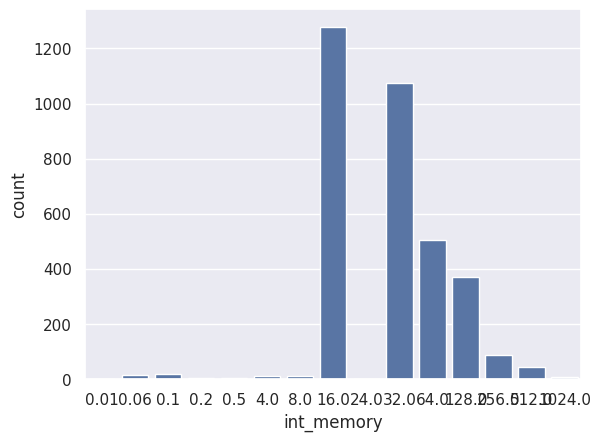

<Axes: xlabel='ram', ylabel='Count'>

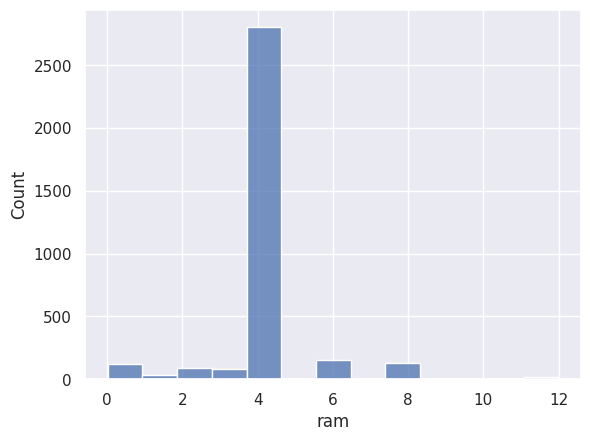

<Axes: xlabel='ram'>

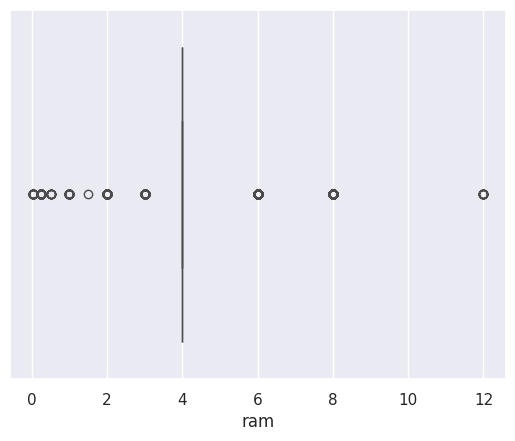

<Axes: xlabel='ram', ylabel='count'>

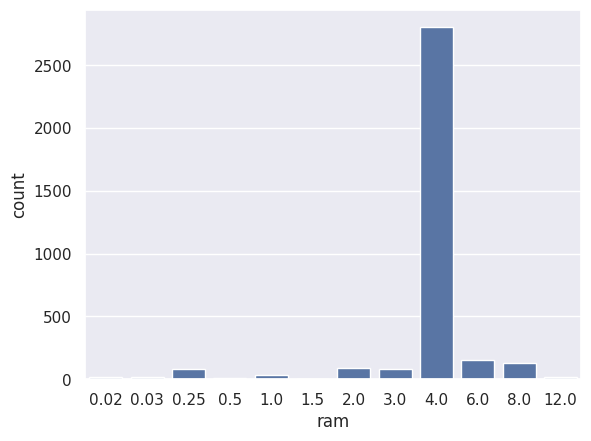

<Axes: xlabel='battery', ylabel='Count'>

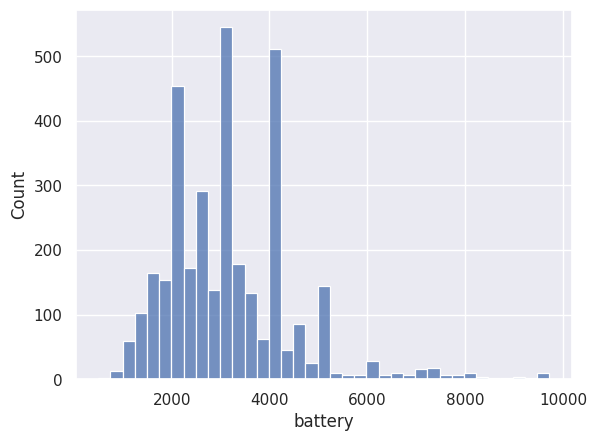

<Axes: xlabel='battery'>

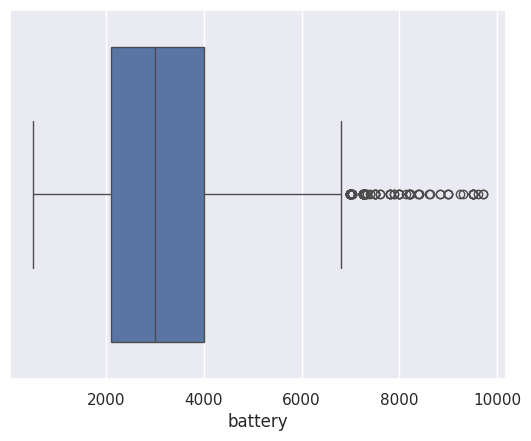

<Axes: xlabel='battery', ylabel='count'>

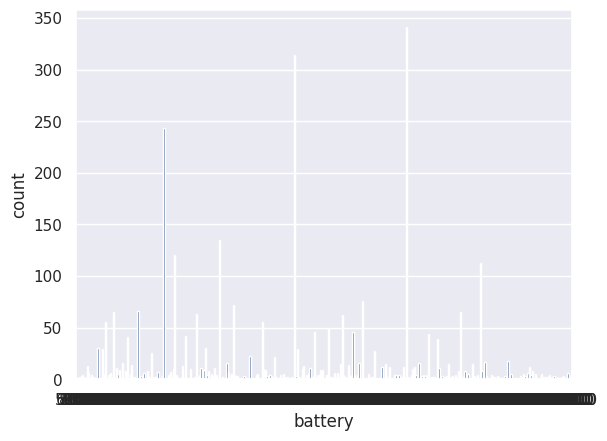

<Axes: xlabel='int_memory', ylabel='Count'>

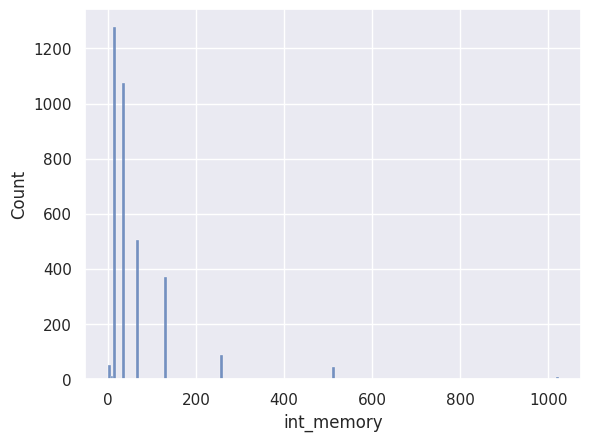

<Axes: xlabel='int_memory'>

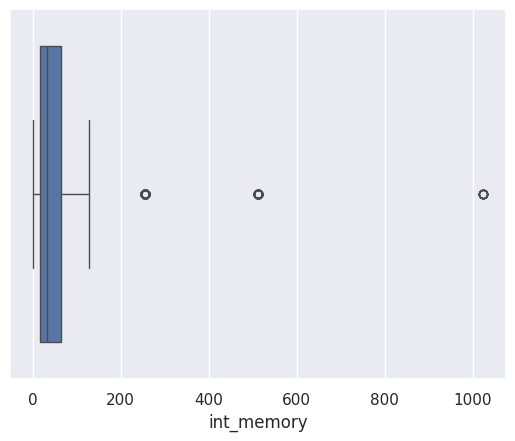

<Axes: xlabel='weight', ylabel='count'>

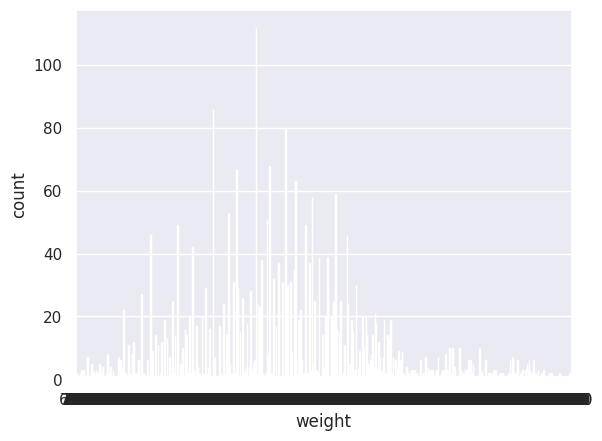

<Axes: xlabel='weight'>

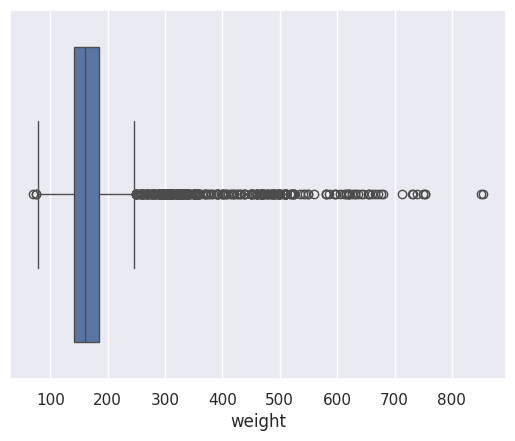

<Axes: xlabel='weight', ylabel='Count'>

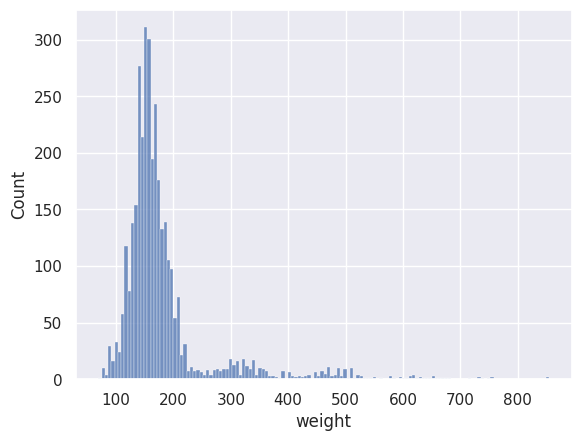

<Axes: xlabel='release_year', ylabel='count'>

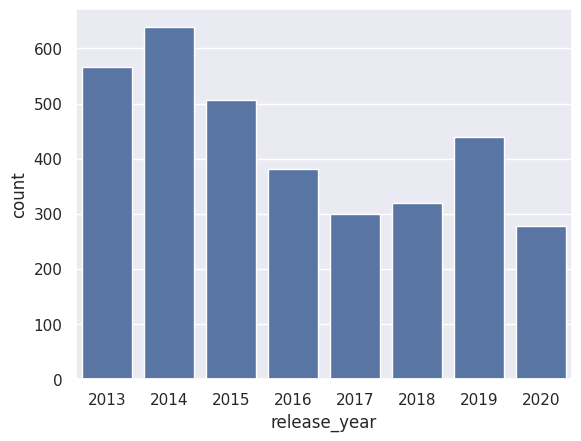

<Axes: xlabel='release_year'>

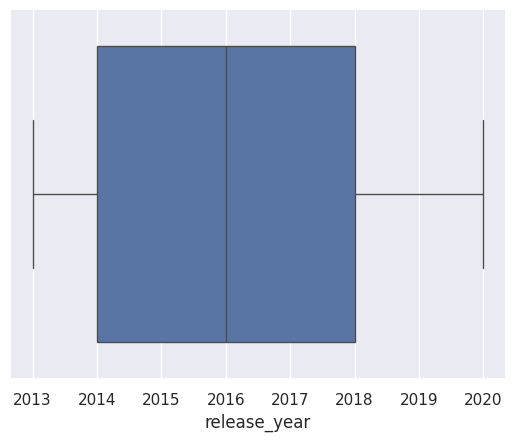

<Axes: xlabel='release_year', ylabel='Count'>

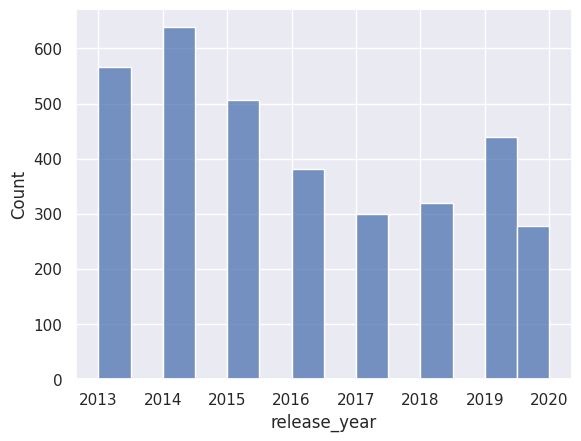

<Axes: xlabel='days_used', ylabel='count'>

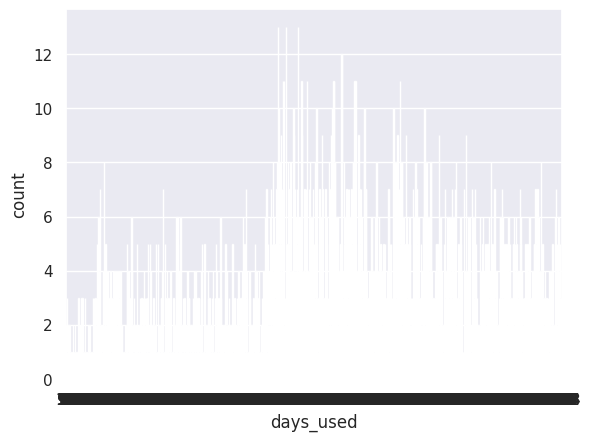

<Axes: xlabel='days_used'>

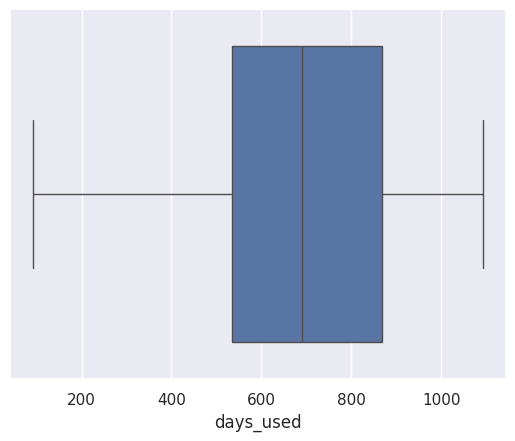

<Axes: xlabel='days_used', ylabel='Count'>

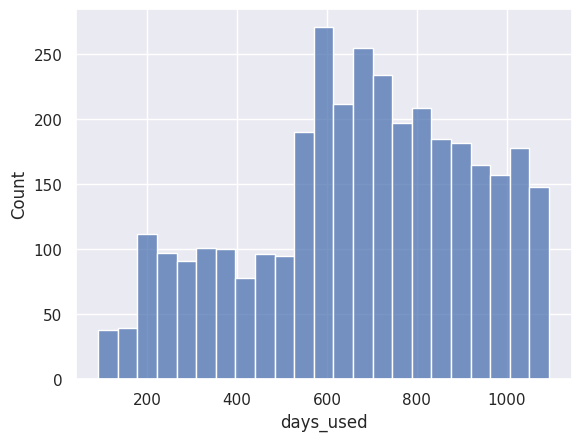

<Axes: xlabel='normalized_used_price', ylabel='count'>

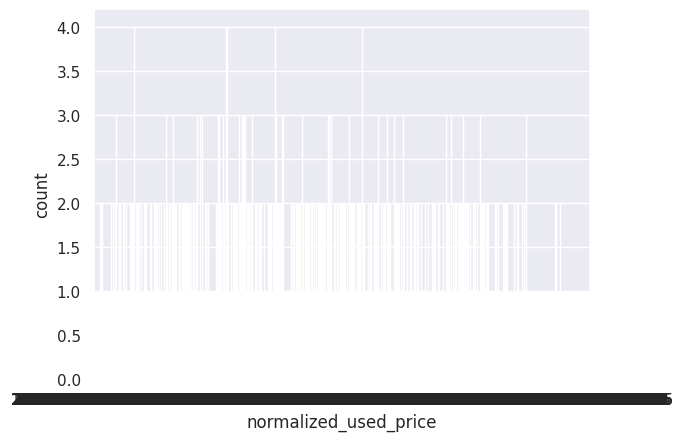

<Axes: xlabel='normalized_used_price'>

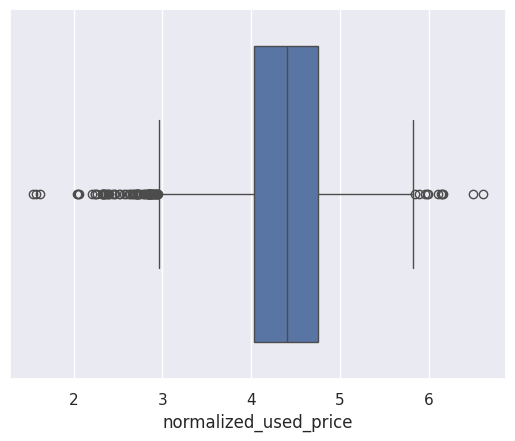

<Axes: xlabel='normalized_used_price', ylabel='Count'>

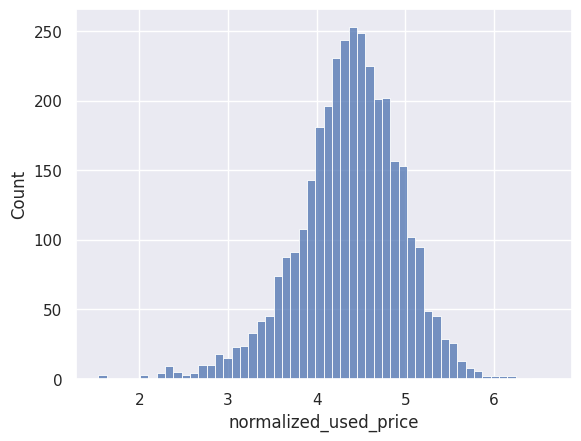

<Axes: xlabel='normalized_new_price', ylabel='count'>

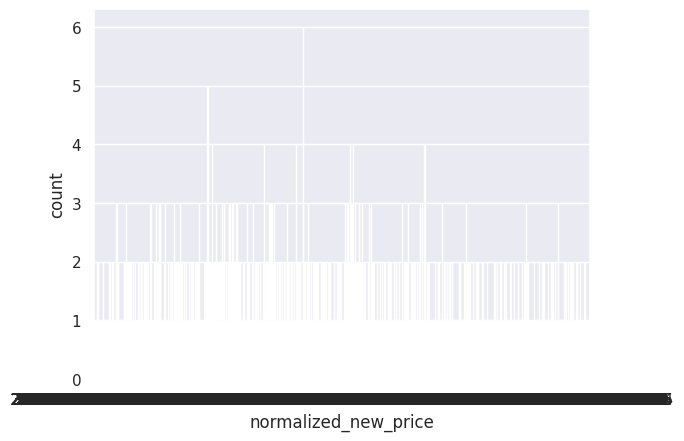

<Axes: xlabel='normalized_new_price'>

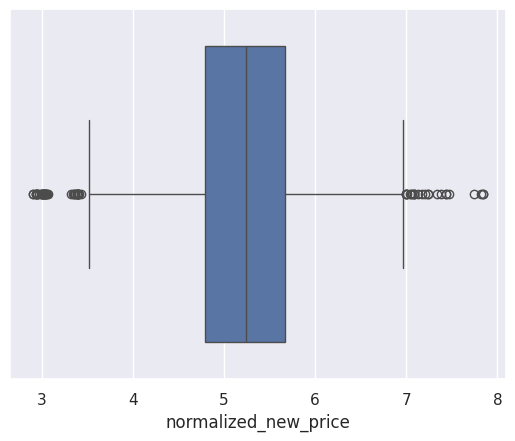

<Axes: xlabel='normalized_new_price', ylabel='Count'>

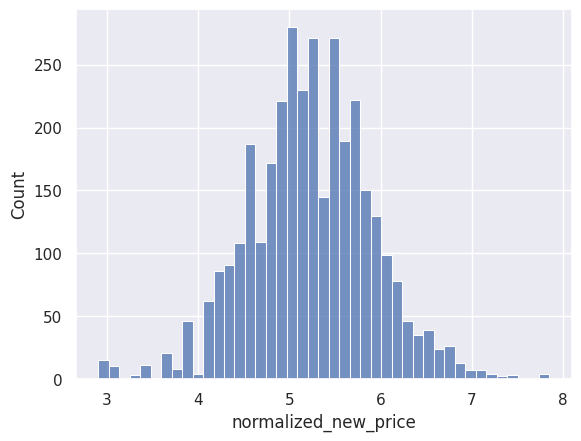

In [24]:

#Numerical value analysis
sns.histplot(data=df,x='selfie_camera_mp')
plt.show()
sns.boxplot(data=df,x='selfie_camera_mp')
plt.show()
sns.countplot(data=df,x='selfie_camera_mp')
plt.show()


sns.histplot(data=df,x='int_memory')
plt.show()
sns.boxplot(data=df,x='int_memory')
plt.show()
sns.countplot(data=df,x='int_memory')
plt.show()

sns.histplot(data=df,x='ram')
plt.show()
sns.boxplot(data=df,x='ram')
plt.show()
sns.countplot(data=df,x='ram')
plt.show()

sns.histplot(data=df,x='battery')
plt.show()
sns.boxplot(data=df,x= 'battery')
plt.show()
sns.countplot(data=df,x='battery')
plt.show()

sns.histplot(data=df,x='int_memory')
plt.show()
sns.boxplot(data=df,x='int_memory')
plt.show()

sns.countplot(data=df,x='weight')
plt.show()
sns.boxplot(data=df,x='weight')
plt.show()
sns.histplot(data=df,x='weight')
plt.show()

sns.countplot(data=df,x='release_year')
plt.show()
sns.boxplot(data=df,x='release_year')
plt.show()
sns.histplot(data=df,x='release_year')
plt.show()

sns.countplot(data=df,x='days_used')
plt.show()
sns.boxplot(data=df,x='days_used')
plt.show()
sns.histplot(data=df,x='days_used')
plt.show()

sns.countplot(data=df,x='normalized_used_price')
plt.show()
sns.boxplot(data=df,x='normalized_used_price')
plt.show()
sns.histplot(data=df,x='normalized_used_price')
plt.show()

sns.countplot(data=df,x='normalized_new_price')
plt.show()
sns.boxplot(data=df,x='normalized_new_price')
plt.show()
sns.histplot(data=df,x='normalized_new_price')
plt.show()




Our findings of the dataset conclude that there are more cameras with selfie cameras under 10 mp. This is suprising, as one would guess that more and more cameras with more advanced selfie cameras would be present. Internal memory is heavily skewed to the left. As noted earlier, most phones carry 4 GB of RAM. Suprisingly, we found that most phones carried less than 4000 mAH battery power. Internal memory and weight are highly skewed to the left. Most phones are available with a release year of 2014 followed by 2013 and 2015. Most phones were used over 600 days. Additionally, we noticed correlation exists between the new price and the used price.

**The distribution of the normalized used prices are skewed left to normal, we are seeing that most prices are going to be between 4 and 6.**

**It looks like 93.3% of the used phone market is dominated by Android phones**

**The amount of RAM is important for the smooth functioning of a device. Ram seems to vary braodly among brands,with the two brands carrying the most Rams being OnePlus and Oppo.**

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. As the battery size increases, the weight increases- indicating a positive correlation.**

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. There are 34 brands available that feature screens larger than 6 inches witht he top brands being "Other", "Samsung" and "Huawei".**

**Suprisingly, we are seeing that most selfie cameras are going to be less than 8-10 mp.**

**When it comes to the normalized pricing, we are seeing that the new price and the used price are highly correlated.**



    brand_name  count
24      Others    479
27     Samsung    334
11      Huawei    251
14          LG    197
16      Lenovo    171
33         ZTE    138
32      Xiaomi    132
23        Oppo    129
3         Asus    122
30        Vivo    117
10       Honor    116
1      Alcatel    115
9          HTC    110
18    Micromax    108
20    Motorola    104
28        Sony     86
21       Nokia     70
17       Meizu     59
7       Gionee     56
0         Acer     51
25   Panasonic     47
31        XOLO     42
26      Realme     41
2        Apple     39
15        Lava     36
29       Spice     30
13     Karbonn     29
5       Celkon     25
22     OnePlus     22
6      Coolpad     22
19   Microsoft     21
4   BlackBerry     21
8       Google     13
12     Infinix     10
Number of unique brands: 34


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='brand_name', ylabel='count'>

Text(0.5, 1.0, 'Count of Phones with Screen Size > 6 Inches by Brand')

Text(0.5, 0, 'Brand Name')

Text(0, 0.5, 'Count')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'

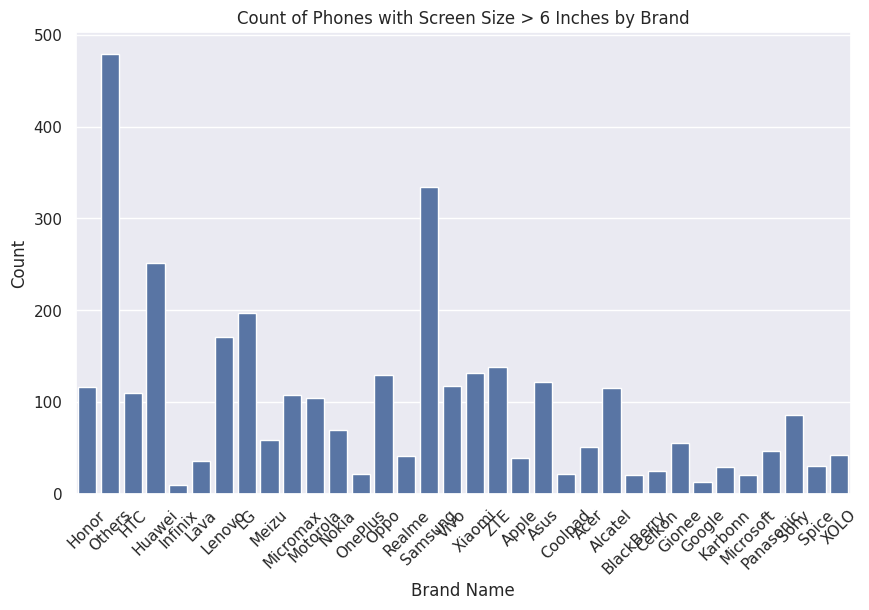

In [25]:
# Group the filtered DataFrame by brand and count the number of phones for each brand
# Filter the DataFrame for phones with screen size larger than 6 inches
df_filtered = df[df['screen_size'] > 6]
brand_counts = df_filtered.groupby('brand_name').size().reset_index(name='count').sort_values(by='count', ascending=False)


# Display the table
print(brand_counts)

num_brands = df_filtered['brand_name'].nunique()
print("Number of unique brands:", num_brands)

# Plot the count of phones by brand
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='brand_name')
plt.title('Count of Phones with Screen Size > 6 Inches by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Weight vs. Battery Capacity for Devices with Battery > 4500 mAh')

Text(0.5, 0, 'Battery Capacity (mAh)')

Text(0, 0.5, 'Weight (g)')

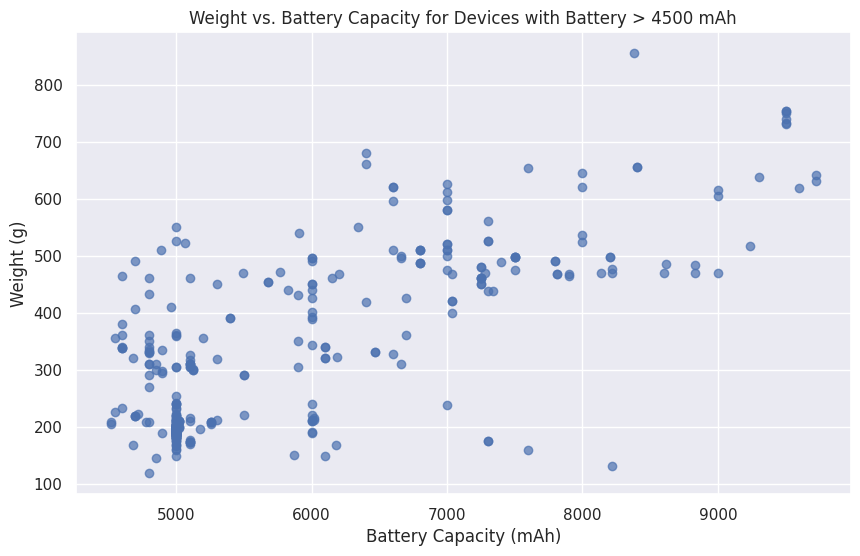

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Weight vs. Battery Capacity for Devices with Battery > 4500 mAh')

Text(0.5, 0, 'Battery Capacity (mAh)')

Text(0, 0.5, 'Weight (g)')

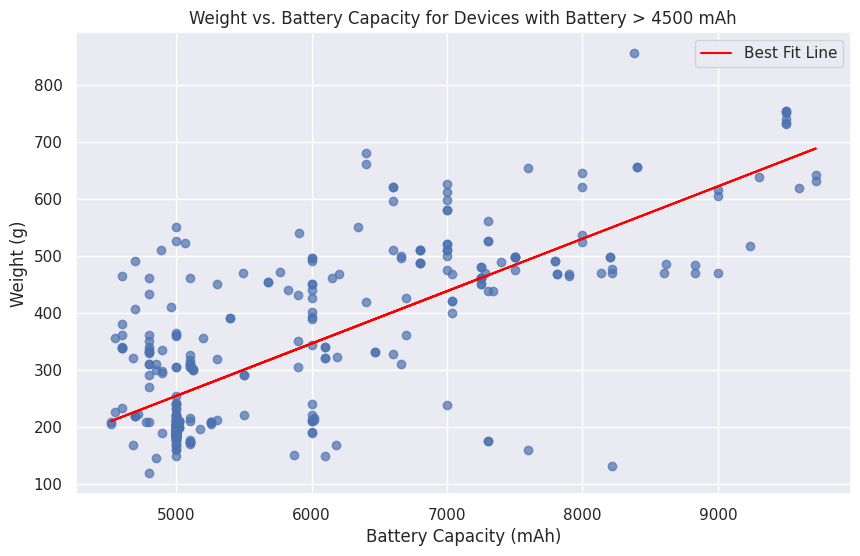

In [26]:
# Filter the DataFrame for devices with battery capacity more than 4500 mAh
df_large_battery = df[df['battery'] > 4500]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_large_battery['battery'], df_large_battery['weight'], alpha=0.7)
plt.title('Weight vs. Battery Capacity for Devices with Battery > 4500 mAh')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.show()

#make a regression line to analyze the trend better

# battery capacity and weight as numpy arrays
x = df_large_battery['battery'].values
y = df_large_battery['weight'].values

# Calculate the coefficients (slope and intercept) of the linear regression line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Generate the regression line's y values
regression_line = slope * x + intercept

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.plot(x, regression_line, color='red', label='Best Fit Line')  # Plot the regression line
plt.title('Weight vs. Battery Capacity for Devices with Battery > 4500 mAh')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.legend()  # Show the legend
plt.show()

#proven positive correlation between battery size and weight

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='brand_name', ylabel='count'>

Text(0.5, 1.0, 'Countplot of phone brands')

Text(0.5, 0, 'Brand Name')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'

Text(0, 0.5, 'Number of phones')

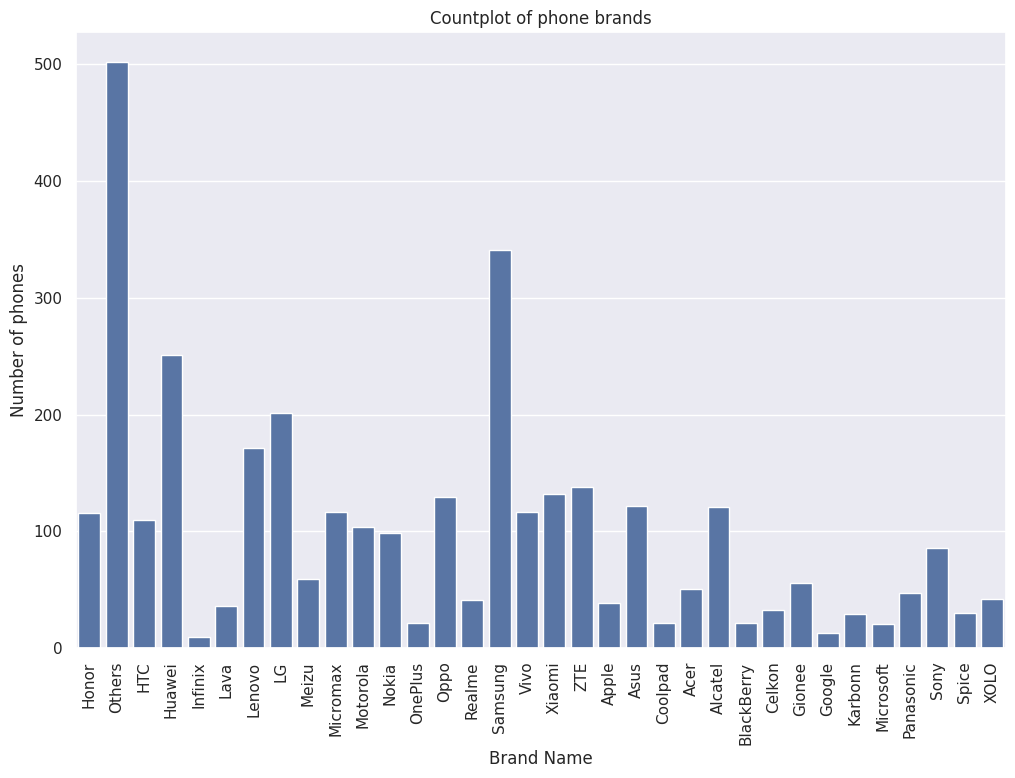

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7bf6acbdbe80>,
 [Text(-1.0936020182238675, 0.11846782574473247, 'Others'),
  Text(-0.6981102572776741, -0.8500835657061604, 'Samsung'),
  Text(0.009340571569403504, -1.0999603418863595, 'Huawei'),
  Text(0.5654822377806354, -0.9435199196384807, 'LG'),
  Text(0.9118931339364998, -0.615183641101963, 'Lenovo'),
  Text(1.0709866596561872, -0.2509732552254973, 'ZTE'),
  Text(1.0958141645348745, 0.09587135549649624, 'Xiaomi'),
  Text(1.015661504113363, 0.4224117766613298, 'Oppo'),
  Text(0.84889669447374, 0.6995530016457352, 'Asus'),
  Text(0.6173262499972961, 0.9104440131409927, 'Alcatel'),
  Text(0.34185877854352076, 1.0455298061426714, 'Micromax'),
  Text(0.044966255245238056, 1.099080541129366, 'Vivo'),
  Text(-0.2540503311469086, 1.0702609164330659, 'Honor'),
  Text(-0.5261875586734043, 0.9659848099723529, 'HTC'),
  Text(-0.7501141293960764, 0.8045674570105149, 'Motorola')],
 [Text(-0.5965101917584731, 0.06461881404258134, '18.8%'),
  Text(-0.38078741306

Text(0.5, 1.0, 'Distribution of Brand Names')

(-1.0999988412704151,
 1.0999999431160257,
 -1.0999999998578467,
 1.0999999994875005)

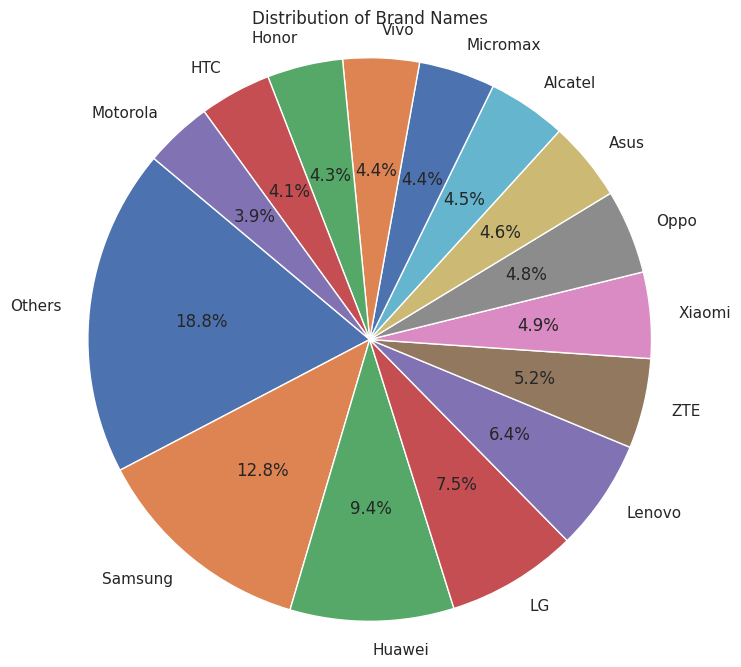

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='os', ylabel='count'>

Text(0.5, 1.0, 'Countplot of Operating Systems')

Text(0.5, 0, 'Operating Systems')

([0, 1, 2, 3],
 [Text(0, 0, 'Android'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'iOS'),
  Text(3, 0, 'Windows')])

Text(0, 0.5, 'Number of phones')

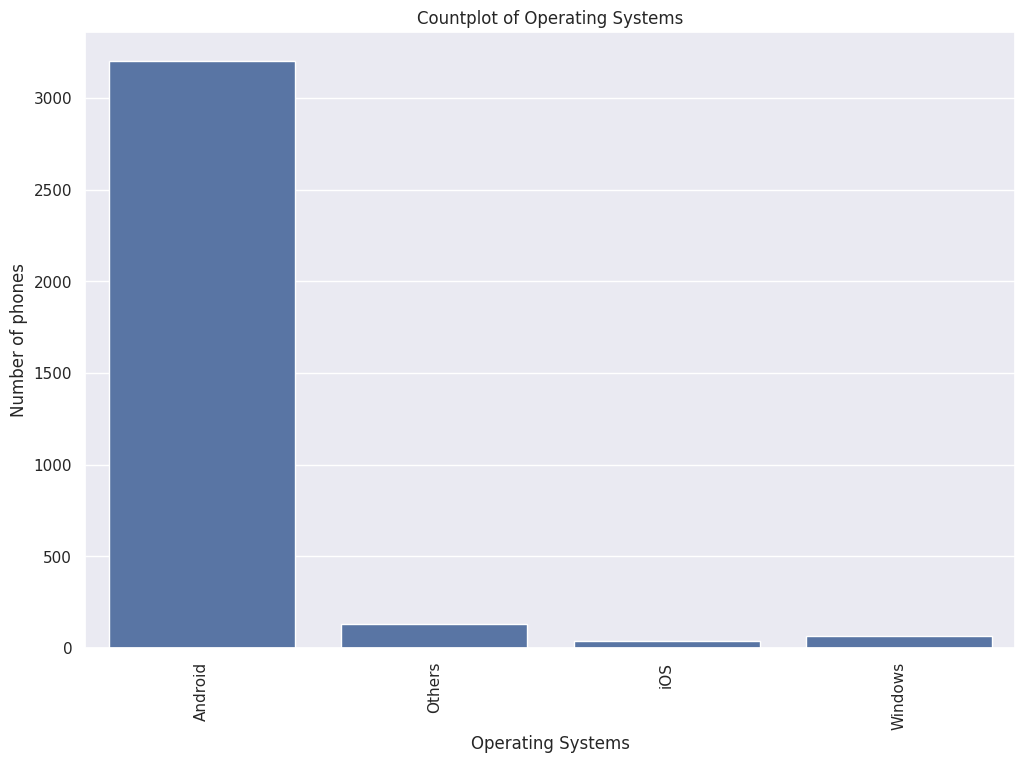

<Figure size 800x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7bf6acae6020>,
 [Text(0.6753736038842864, -0.8682571595883051, 'Android'),
  Text(-0.5931288096649415, 0.9263898829032243, 'Others'),
  Text(-0.7482721162094761, 0.8062808692406093, 'Windows'),
  Text(-0.8188810334165223, 0.7344616076492282, 'iOS')],
 [Text(0.3683856021187016, -0.47359481432089356, '93.3%'),
  Text(-0.3235248052717863, 0.5053035724926678, '3.8%'),
  Text(-0.4081484270233505, 0.4397895650403323, '1.9%'),
  Text(-0.44666238186355756, 0.4006154223541244, '1.0%')])

Text(0.5, 1.0, 'Percentage of Used Device Market by Operating System')

(-1.0999999730924117,
 1.099999689734345,
 -1.099999918223836,
 1.0999998888698794)

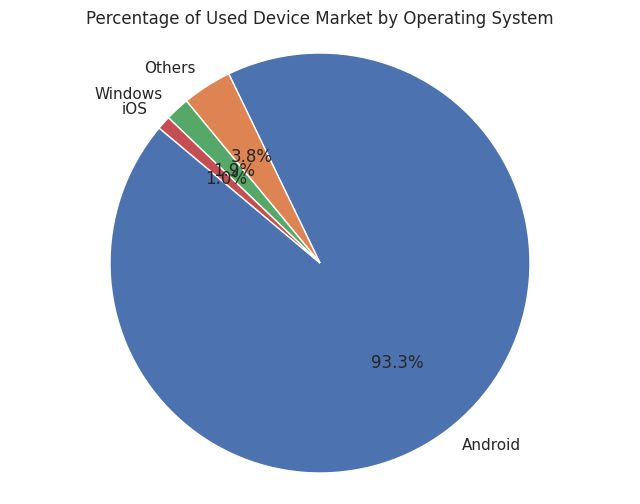

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='network_type', ylabel='count'>

Text(0.5, 1.0, 'Count of 4G and 5G Availability')

Text(0.5, 0, 'Network Type')

Text(0, 0.5, 'Count')

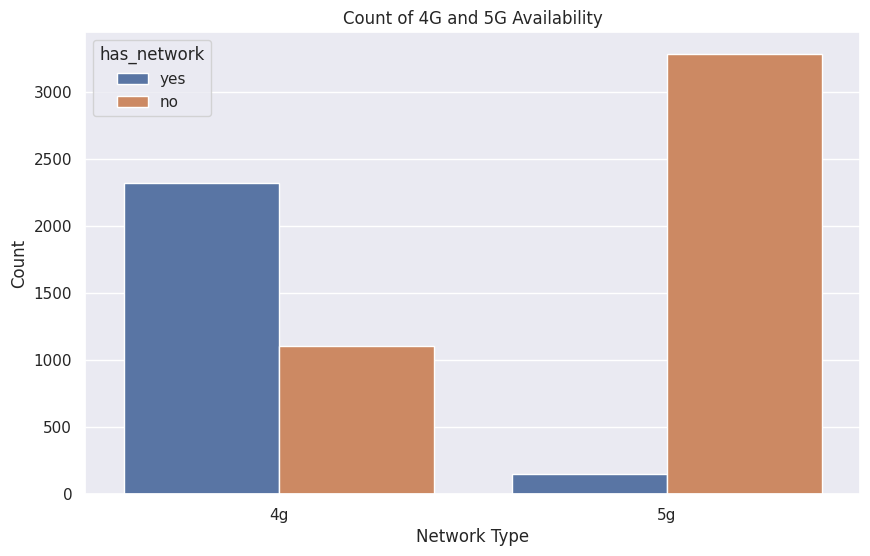

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='brand_name', ylabel='ram'>

Text(0.5, 1.0, 'RAM Variation Across Different Brands')

Text(0.5, 0, 'Brand Name')

Text(0, 0.5, 'RAM (GB)')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'

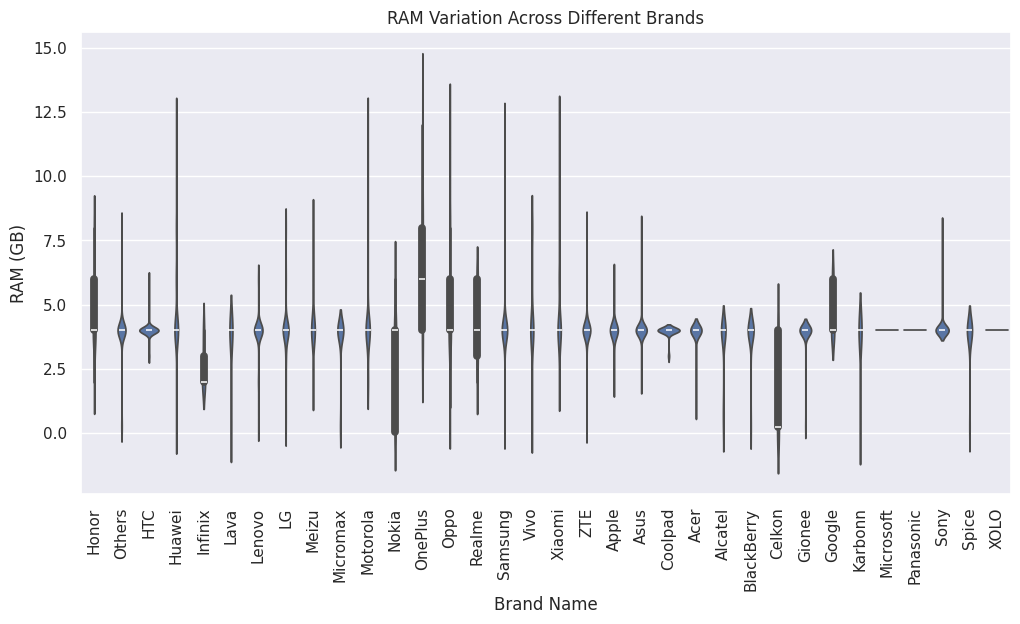

In [27]:
#Categorical Analysis
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='brand_name');
plt.title("Countplot of phone brands")
plt.xlabel('Brand Name')  # Set x-axis label
plt.xticks(rotation=90)
plt.ylabel('Number of phones') #y labels
plt.show()

# Get value counts of 'brand_name' column
brand_counts = df['brand_name'].value_counts()
#theres alot of brands so we are just going to do top 15
# Select top 15 brands
top_15_brands = brand_counts.head(15)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_15_brands, labels=top_15_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brand Names')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#Categorical Analysis
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='os');
plt.title("Countplot of Operating Systems")
plt.xlabel('Operating Systems')  # Set x-axis label
plt.xticks(rotation=90)
plt.ylabel('Number of phones') #y labels
plt.show()

# Group the DataFrame by operating system and count the number of devices for each OS
os_counts = df['os'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Used Device Market by Operating System')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#4g and5g phones
# Combine the '4g' and '5g' columns into a single DataFrame for plotting
combined_data = pd.concat([df['4g'], df['5g']], axis=1)

# Melt the DataFrame to convert it into long format for seaborn plotting
melted_data = combined_data.melt(var_name='network_type', value_name='has_network')

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='network_type', hue='has_network', data=melted_data)
plt.title('Count of 4G and 5G Availability')
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.show()

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='brand_name', y='ram')
plt.title('RAM Variation Across Different Brands')
plt.xlabel('Brand Name')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

It is very interesting to see how Android phones dominate the market- specifically Samsung and Huawei. Additionally, Android is the dominate operating system. Suprisingly, most of these phones don't support the 5G network

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='release_year', ylabel='days_used'>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020')])

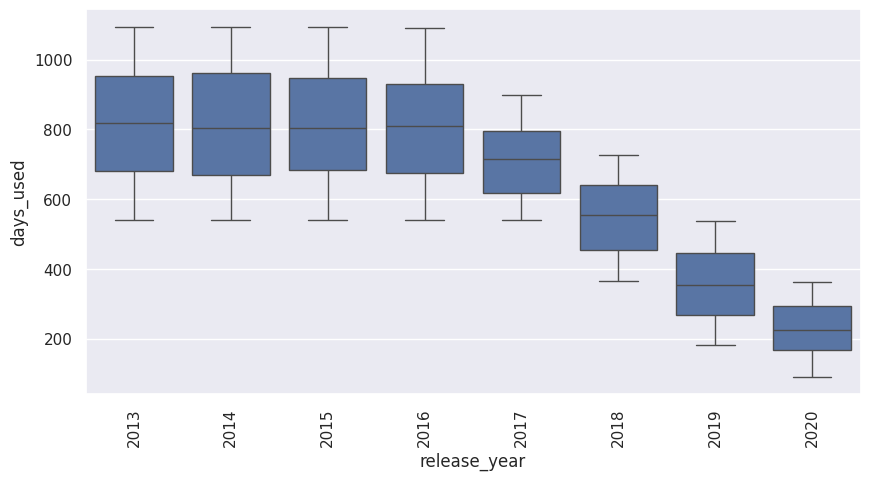

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='main_camera_mp', ylabel='selfie_camera_mp'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '0.08'),
  Text(1, 0, '0.3'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.2'),
  Text(4, 0, '1.3'),
  Text(5, 0, '2.0'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.15'),
  Text(8, 0, '4.0'),
  Text(9, 0, '5.0'),
  Text(10, 0, '6.5'),
  Text(11, 0, '6.7'),
  Text(12, 0, '8.0'),
  Text(13, 0, '8.1'),
  Text(14, 0, '10.0'),
  Text(15, 0, '10.5'),
  Text(16, 0, '12.0'),
  Text(17, 0, '12.2'),
  Text(18, 0, '12.3'),
  Text(19, 0, '12.5'),
  Text(20, 0, '12.6'),
  Text(21, 0, '13.0'),
  Text(22, 0, '13.1'),
  Text(23, 0, '14.5'),
  Text(24, 0, '16.0'),
  Text(25, 0, '16.3'),
  Text(26, 0, '18.0'),
  Text(27, 0, '19.0'),
  Text(28, 0, '20.0'),
  Text(29, 0, '20.1'),
  Text(30, 0, '20.2'),
  Text(31, 0, '20.7'),
  Text(32, 0, '21.0'),
  Text(33, 0, '21.2'),
  Text(34, 0, '

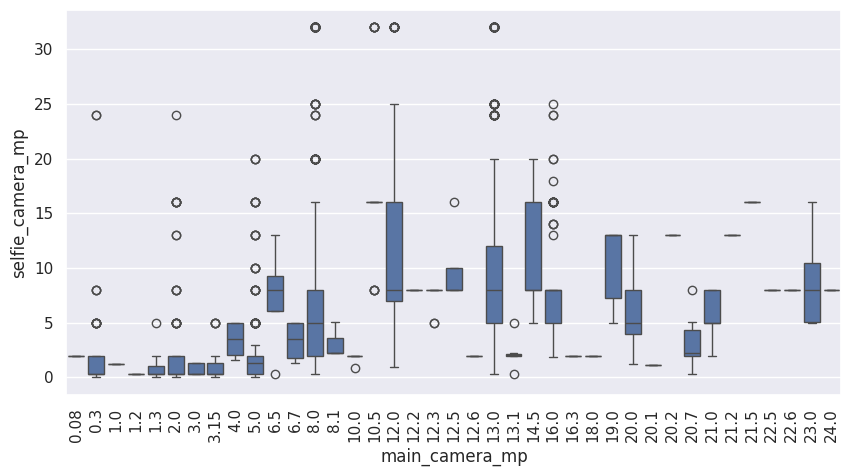

In [28]:
#Bivariate and multiple variate analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="release_year", y="days_used")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="main_camera_mp", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()



Across the data as a whole, it is really interesting to see the apparent outliers that exist. We did treat the outliers, but noticed how they negatively affected our model. Speaking ofoutliers, there exist many outliers when comparing cameras between selfie cameras and the main camera A really interesting find was that more phones were held on to for longer periods of time (over 400 days) prior to 2017. Could this be due to an uptick in consumerism or a change in trends and technology?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='release_year', ylabel='normalized_new_price'>

Text(0.5, 1.0, 'Release Year vs Normalized New Price (by Operating System)')

Text(0.5, 0, 'Release Year')

Text(0, 0.5, 'Normalized New Price')

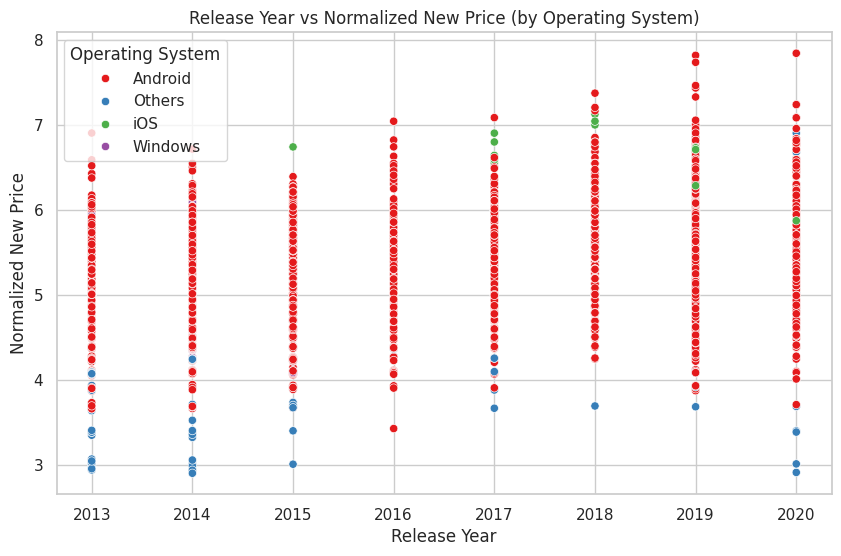

In [29]:
# readability
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='normalized_new_price', hue='os', palette='Set1')
plt.title('Release Year vs Normalized New Price (by Operating System)')
plt.xlabel('Release Year')
plt.ylabel('Normalized New Price')
plt.legend(title='Operating System')
plt.show()

Across the board, Androids were released more consistenly each year and tend to be be the more expensive phones.

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

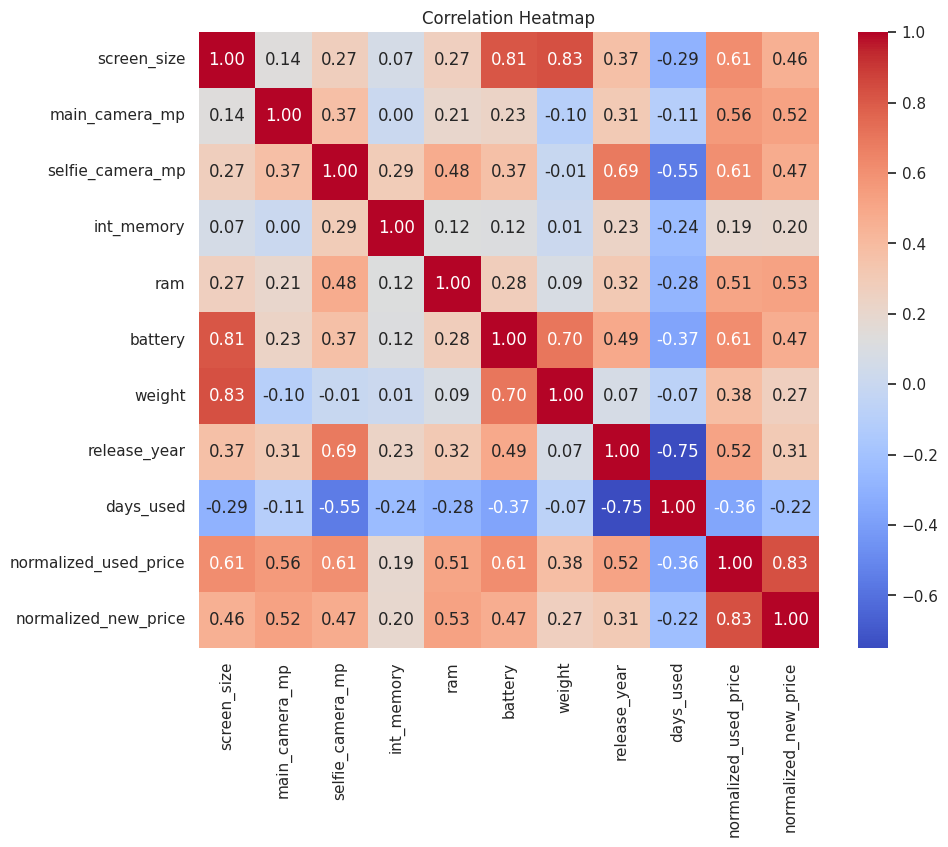

In [30]:
#heatmap omiting object variables
selected_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory','ram','battery','weight', 'release_year','days_used','normalized_used_price','normalized_new_price']  # Specify the columns you want to include
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The strongest correlations exist between Weight and screen size, battery and screen size, the new price and the used price. We can see a strong negative correlation between the release year and the days used.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [31]:
#removing outliers
#from scipy.stats import zscore

#copying the data frame to prep for dummy variables
df2=df.copy()
df2.head()

#dropping the column brand names
df2.drop('brand_name', axis=1, inplace=True)
#confirm drop
#df2.head()

#preping for dummy variables, the 2nd and 3rd columns we can prep are 4g and 5g
df2['4g'] = df2['4g'].replace({'yes': 1, 'no': 0})
df2['5g'] = df2['5g'].replace({'yes': 1, 'no': 0})
print("After replacing yes and no for 1 and 0")
df2.head()

# Identify categorical columns
categorical_columns = df2.select_dtypes(include=['category', 'object']).columns
print(categorical_columns)
#the last categorical column is now 'os', Operating System.
# Check unique values of 'os' column before creating dummy variables
print("Unique values in os")
print(df2['os'].unique())
print("Value counts present in OS before creating dummy values")
print(df2['os'].value_counts())


# Convert categorical columns into dummy variables
df2_clean = pd.get_dummies(df2, columns=['os'], dtype=int, drop_first=True)
# Checking unique values in os columns
print("After dummy variables")
print(df2_clean['os_Windows'].unique())
print(df2_clean['os_Windows'].value_counts())
print(df2_clean['os_Others'].unique())
print(df2_clean['os_Others'].value_counts())
print(df2_clean['os_iOS'].unique())
print(df2_clean['os_iOS'].value_counts())
df2_clean.head()


# we remove the outliers so we can have more accurate models
# Calculate Z-scores for each column
#z_scores = df2_clean.apply(zscore)

# Define threshold for outliers ,gonna use 3
#threshold = 3

# Filter rows where any Z-score exceeds the threshold
#df3 = df2_clean[(z_scores.abs() < threshold).all(axis=1)]
# we remove the outliers so we can have more accurate models
#df3.info()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


After replacing yes and no for 1 and 0


<ipython-input-31-f90edc4cb1ca>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['4g'] = df2['4g'].replace({'yes': 1, 'no': 0})
<ipython-input-31-f90edc4cb1ca>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['5g'] = df2['5g'].replace({'yes': 1, 'no': 0})


,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


Index(['os'], dtype='object')
Unique values in os
['Android' 'Others' 'iOS' 'Windows']
Value counts present in OS before creating dummy values
os
Android    3199
Others      131
Windows      64
iOS          36
Name: count, dtype: int64
After dummy variables
[0 1]
os_Windows
0    3366
1      64
Name: count, dtype: int64
[0 1]
os_Others
0    3299
1     131
Name: count, dtype: int64
[0 1]
os_iOS
0    3394
1      36
Name: count, dtype: int64


,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0,0,0


## EDA

- It is a good idea to explore the data once again after manipulating it.

Since we are now using a subset of our data after we removed exploratory points, we explore the data again to see changes the data trends.

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='screen_size', ylabel='Count'>

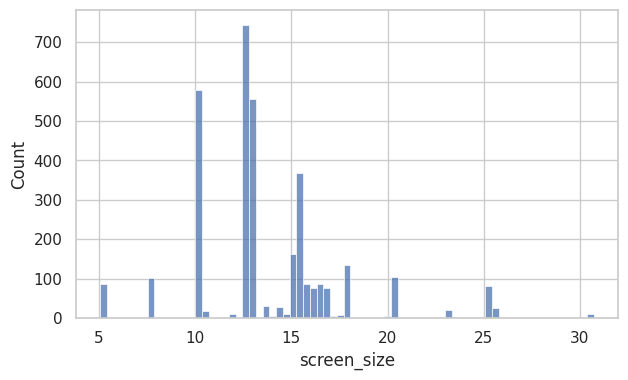

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='4g', ylabel='Count'>

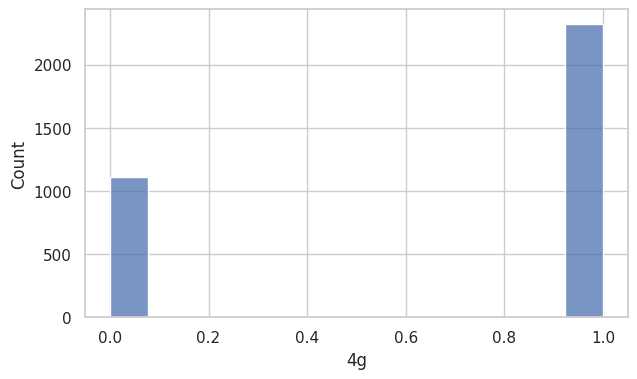

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='5g', ylabel='Count'>

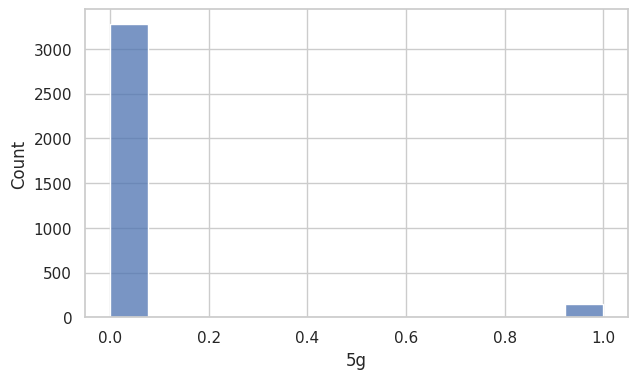

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='main_camera_mp', ylabel='Count'>

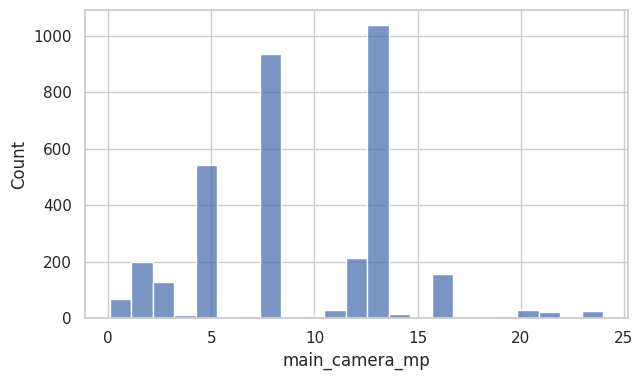

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='selfie_camera_mp', ylabel='Count'>

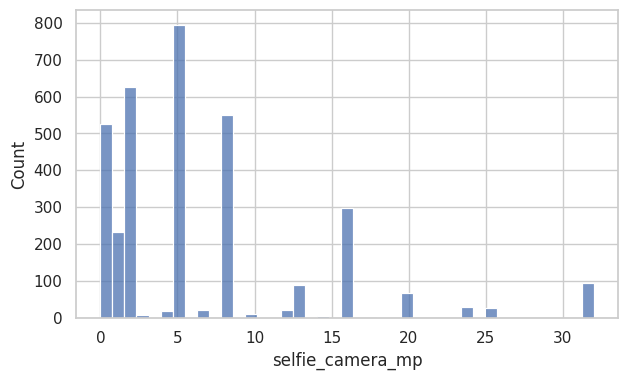

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='int_memory', ylabel='Count'>

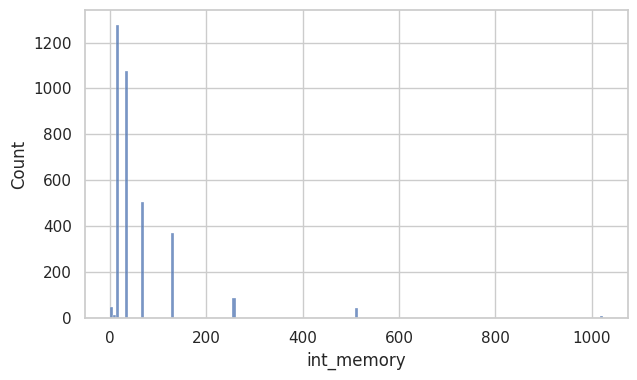

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='ram', ylabel='Count'>

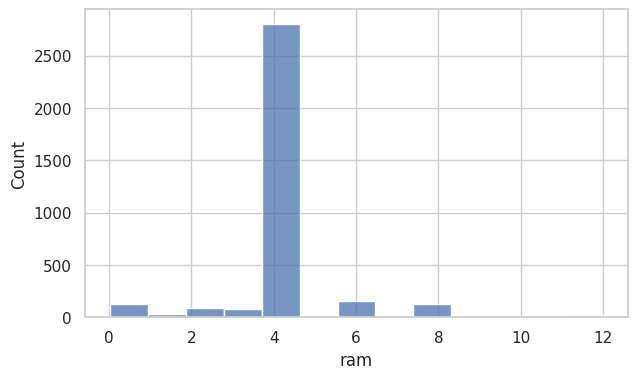

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='battery', ylabel='Count'>

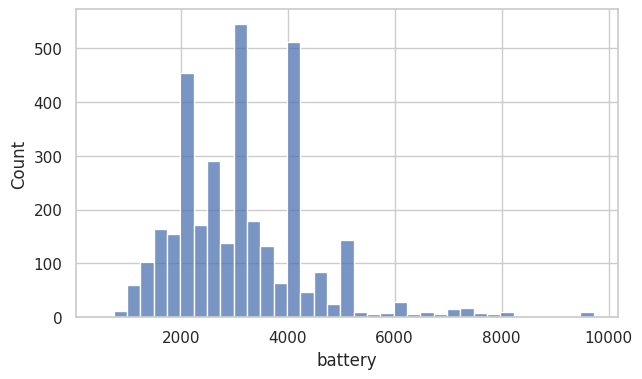

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='weight', ylabel='Count'>

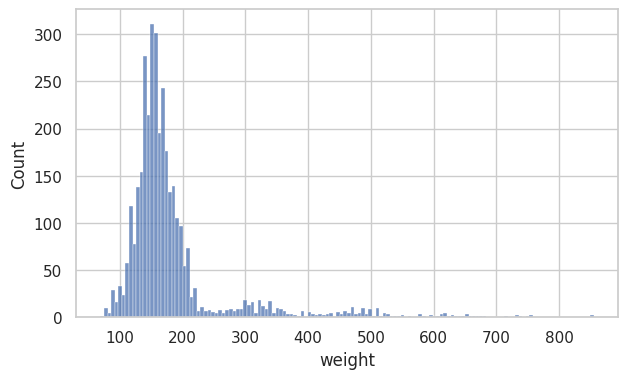

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='release_year', ylabel='Count'>

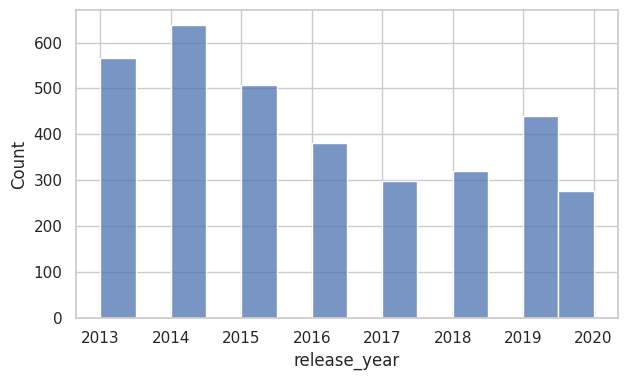

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='days_used', ylabel='Count'>

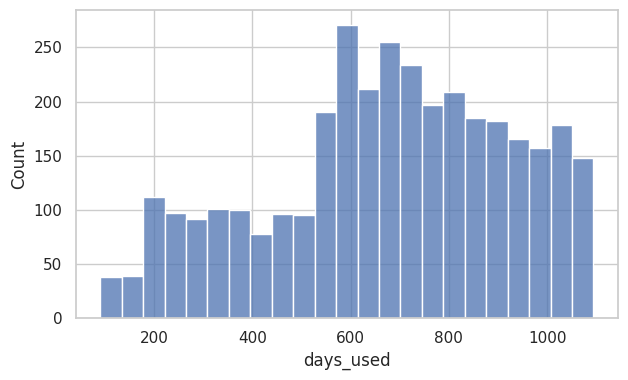

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='normalized_used_price', ylabel='Count'>

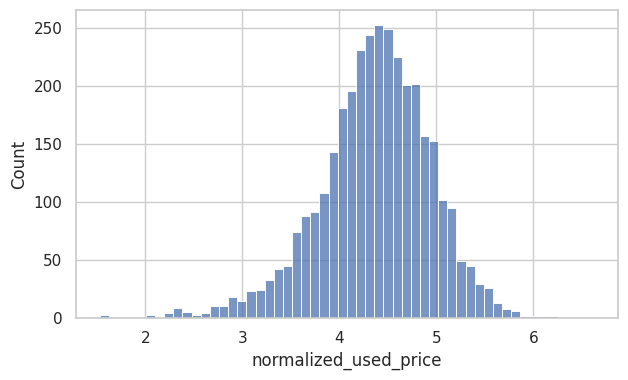

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='normalized_new_price', ylabel='Count'>

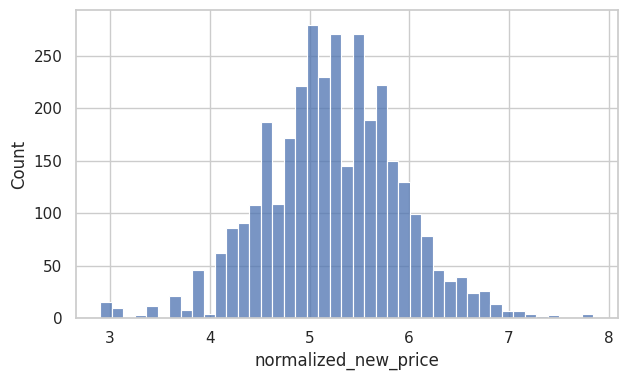

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='os_Others', ylabel='Count'>

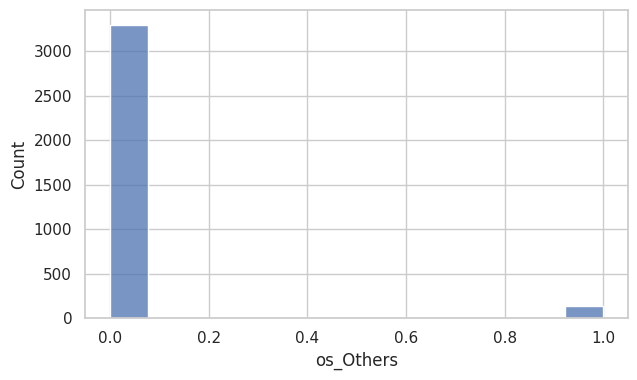

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='os_Windows', ylabel='Count'>

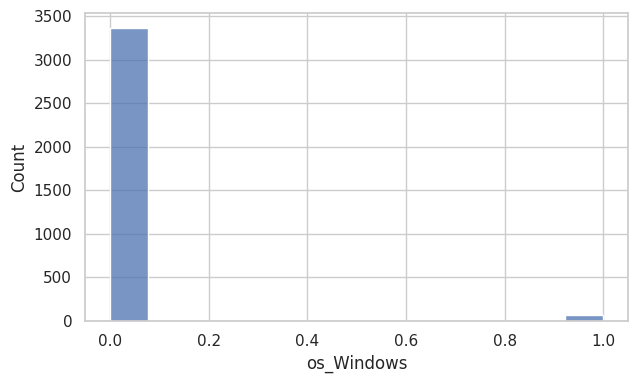

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='os_iOS', ylabel='Count'>

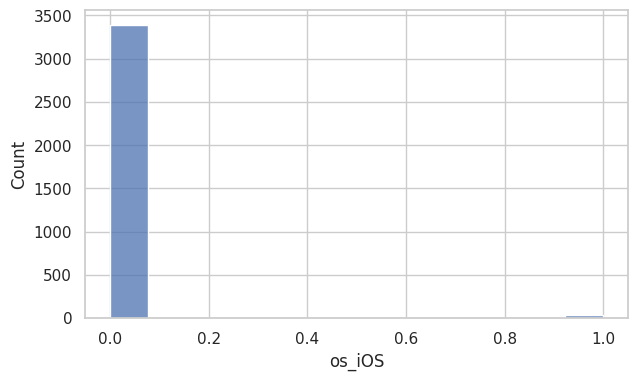

In [32]:
for i in df2_clean.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df2_clean, x=i)
    plt.show()

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='screen_size'>

Text(0.5, 1.0, 'Boxplot of screen_size')

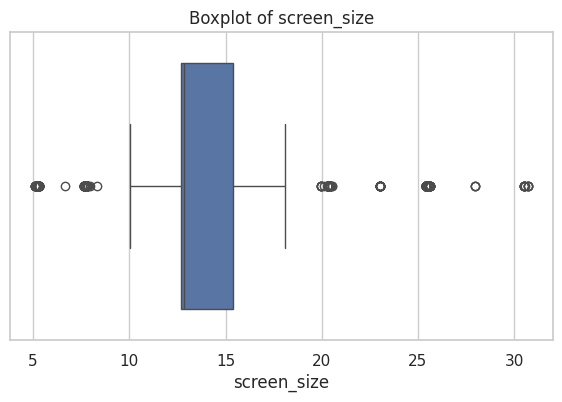

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='4g'>

Text(0.5, 1.0, 'Boxplot of 4g')

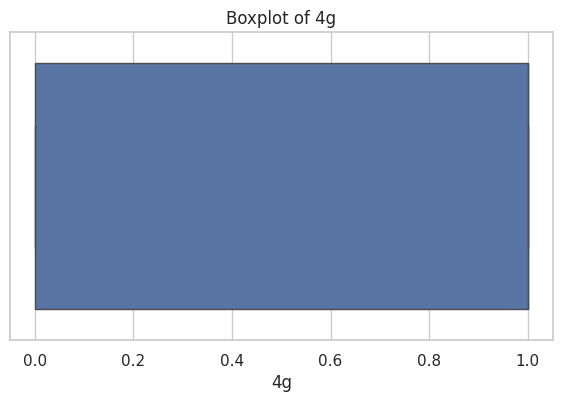

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='5g'>

Text(0.5, 1.0, 'Boxplot of 5g')

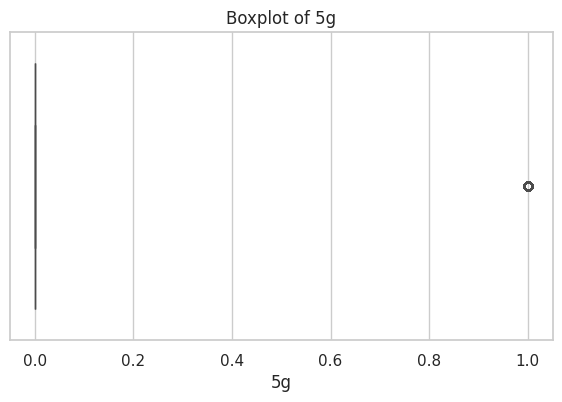

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='main_camera_mp'>

Text(0.5, 1.0, 'Boxplot of main_camera_mp')

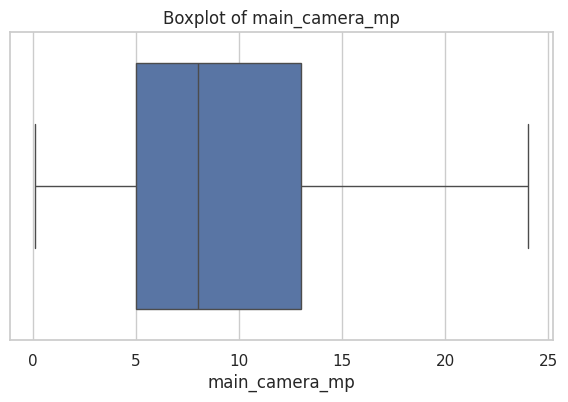

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='selfie_camera_mp'>

Text(0.5, 1.0, 'Boxplot of selfie_camera_mp')

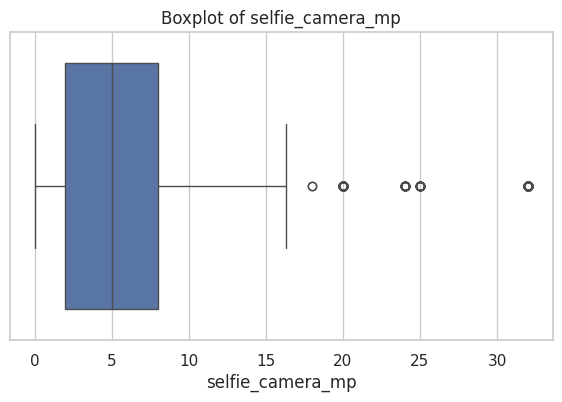

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='int_memory'>

Text(0.5, 1.0, 'Boxplot of int_memory')

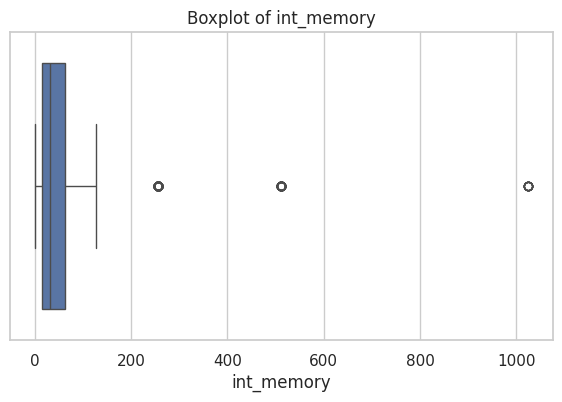

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='ram'>

Text(0.5, 1.0, 'Boxplot of ram')

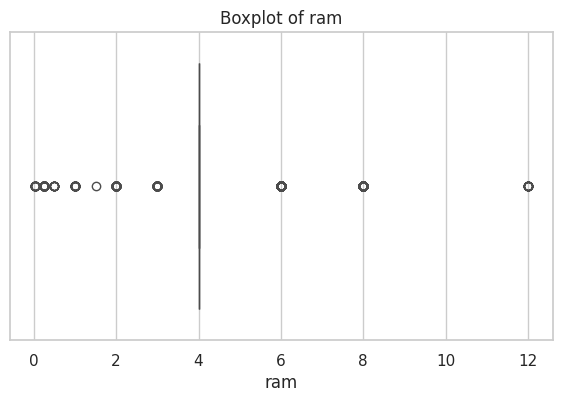

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='battery'>

Text(0.5, 1.0, 'Boxplot of battery')

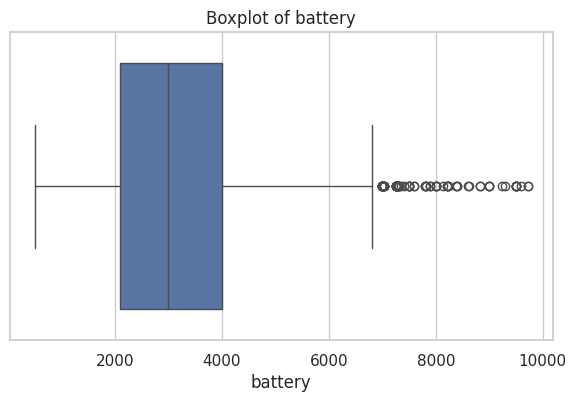

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='weight'>

Text(0.5, 1.0, 'Boxplot of weight')

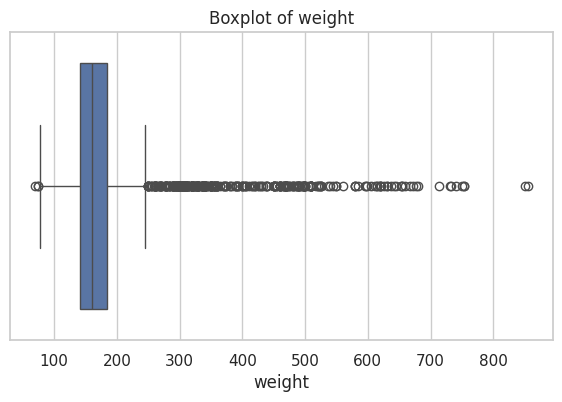

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='release_year'>

Text(0.5, 1.0, 'Boxplot of release_year')

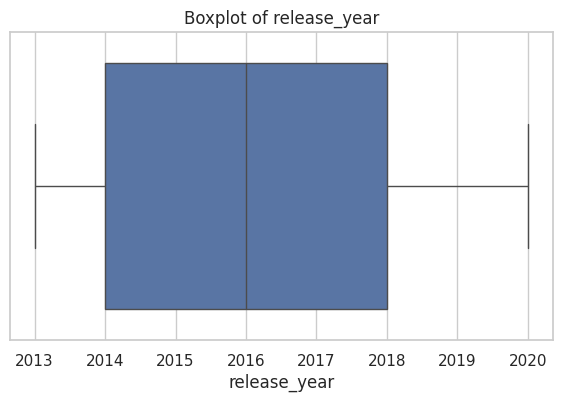

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='days_used'>

Text(0.5, 1.0, 'Boxplot of days_used')

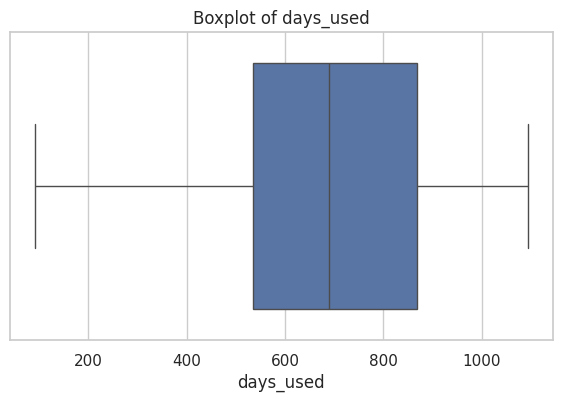

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='normalized_used_price'>

Text(0.5, 1.0, 'Boxplot of normalized_used_price')

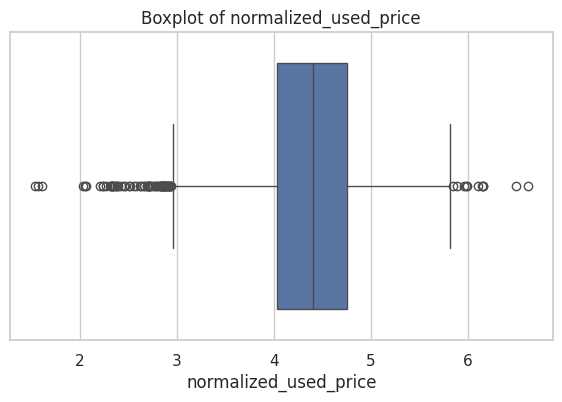

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='normalized_new_price'>

Text(0.5, 1.0, 'Boxplot of normalized_new_price')

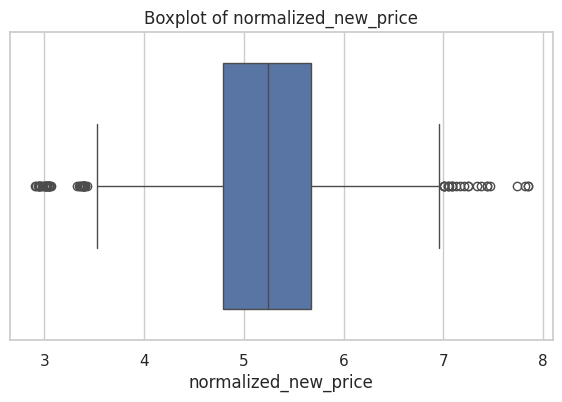

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='os_Others'>

Text(0.5, 1.0, 'Boxplot of os_Others')

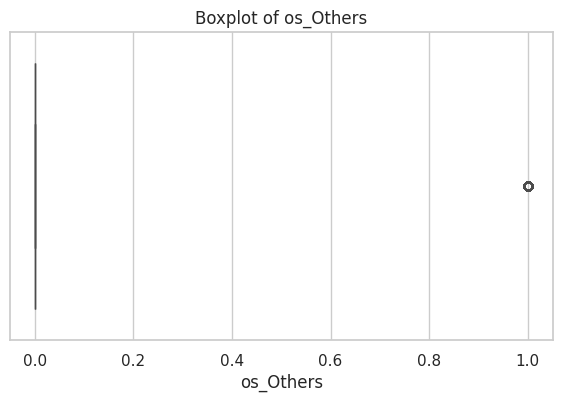

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='os_Windows'>

Text(0.5, 1.0, 'Boxplot of os_Windows')

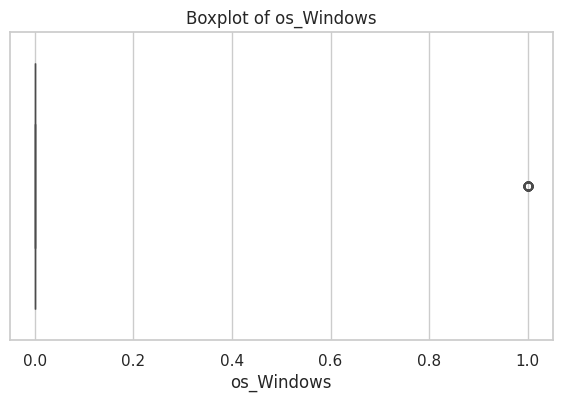

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='os_iOS'>

Text(0.5, 1.0, 'Boxplot of os_iOS')

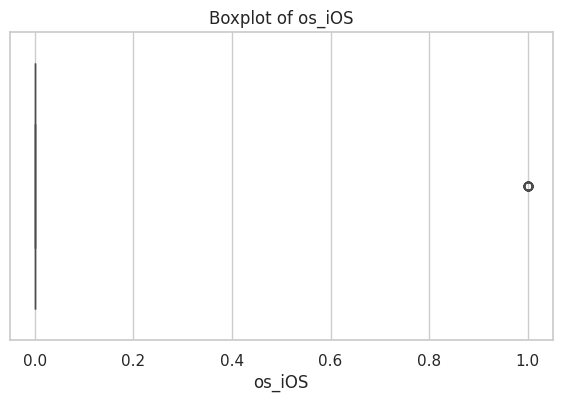

In [33]:
for column in df2_clean.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df2_clean, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

## Model Building - Linear Regression

Our goal is to predict the price of a used phone, and the factors that influence the price. So our dependent variable will come from the column 'normalized_used_price". As we build the model, we will note and analyze how different factors contribute to the used price of the phone.

In [34]:
# 1. defining X and y variables

# y = mx+b

# y = column we predict only
# X = all other columns in my dataframe except the y (used price)

# X will have all the columns that we will use to train the linear regression model:
# y will have only the column that we want to predict

X = df2_clean.drop(["normalized_used_price"], axis=1) # we drop the rating because that's the target coulumn that we are trying to predict.
# The axis=1 parameter indicates that we're dropping a column (as opposed to a row).


# Another way to do it: give me all columns in my dataframe EXCEPT the rating column
# X  = df_clean.loc[:, df_clean.columns != 'rating']

y = df2_clean["normalized_used_price"]  # y will be just the column that we are trying to teach the model to predict.

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

X_df.head()
y_df.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,0,0,0


,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995


In [35]:
# 2. let's add the intercept to data.
X = sm.add_constant(X)

# 3. splitting the data in 70:30 ratio for train to test data
# x_train will have 70% of the enitre dataset we have.
# x_test will have the rest of the data which is 30% of it.
# y_train will have only the ratings column that we want to predict
# y_test will have only the ratings column that we want to test the ML model on and see how good it can predict it.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  #  random_state ensures that the random shuffling of the data is the same each time you run the code with that particular random_state

print("Number of rows in the full data =", X.shape[0])
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

# We will train the model on the x_train: we tell it: this is 70% of my dataset. I want you to go over each row and learn it and also look at the used price column
# so you can see what rating that was.
# based on the rest of the components. Learn it by creating my formula y=mx+b.
# In other words, I want you to understand the relationship between all of my columns and how these columns determine the price of the phone.

pd.DataFrame(x_train).head()
pd.DataFrame(y_train).head()


Number of rows in the full data = 3430
Number of rows in train data = 2401
Number of rows in test data = 1029


,const,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS
1564,1.0,12.70,1,0,13.0,5.0,16.0,4.0,4000.0,149.0,2015,652,5.485129,0,0,0
2923,1.0,13.84,1,0,13.0,5.0,64.0,4.0,3000.0,146.0,2018,525,4.793391,0,0,0
2695,1.0,12.83,1,0,13.0,5.0,16.0,4.0,2600.0,147.0,2015,806,5.384495,0,0,0
3037,1.0,12.75,1,0,21.0,8.0,32.0,4.0,3000.0,159.0,2015,573,6.039302,0,0,0
1227,1.0,10.29,0,0,5.0,0.3,16.0,4.0,2000.0,140.0,2014,613,5.011368,0,0,0


,normalized_used_price
1564,4.424847
2923,4.537427
2695,4.585478
3037,5.191678
1227,3.584074


In [36]:

# We will test the model on x_test: we tell it: this is the 30% of the data I have. For each row, I would like you to predict what could be the 'normalized_used_price' for that row based on what I have trained you
# in the previous step. So come up with a value of the used price for each row in the testing subset of my data.

pd.DataFrame(x_test).head()
pd.DataFrame(y_test).head()

,const,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS
2437,1.0,12.73,1,0,12.00,5.0,32.0,4.0,3000.0,152.0,2016,1048,5.669915,0,0,0
453,1.0,12.70,0,0,5.00,0.3,16.0,4.0,2000.0,150.0,2014,1015,5.138442,0,0,0
2734,1.0,25.43,1,0,8.10,2.2,16.0,4.0,6000.0,495.0,2013,704,5.857476,0,0,0
2168,1.0,12.83,1,0,16.00,16.0,32.0,4.0,3000.0,192.0,2014,703,6.310173,0,0,0
1385,1.0,10.29,0,0,3.15,0.3,16.0,4.0,1730.0,150.0,2013,724,4.688224,0,0,0


,normalized_used_price
2437,4.582106
453,3.470723
2734,5.030242
2168,4.877409
1385,3.471966


## Model Performance Check

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Create and train the model

# This part is telling the model: I am giving you the x_train columns and their respective answer y_train (normalized_used_price). Learn it, understand it, figure it out and come up with the linear regression
# equation y= mx+b that will represent my data to the best of your ability.

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
# Coefficients
# Convert coefficients from scientific notation to numeric format
coefficients_numeric = ["{:.10f}".format(coef) for coef in model.coef_]

# Convert the list to float values
coefficients_numeric = [float(coef) for coef in coefficients_numeric]
print("Coefficients:\n", coefficients_numeric)

# Intercept
print("\nIntercept:\n", model.intercept_) # this is the b value in y=mx+b

# coefficient is basically the m values in y = mx + b (weights) # 100xhousesize

Coefficients:
 [0.0, 0.0204331606, 0.0285641219, -0.0454787088, 0.0213720396, 0.0133291136, 4.40384e-05, 0.0231377781, -1.19714e-05, 0.0010621108, 0.0348055772, 3.26963e-05, 0.4433635638, -0.0390941985, 0.0496889662, -0.0987986568]

Intercept:
 -68.97357827334451


In [39]:
#Make a table so its easier to read and we can see relationships better

# Grab column names from the DataFrame
columns = x_train.columns

# Coefficients
coefficients = list(model.coef_) + [model.intercept_]  # Append intercept to the coefficients list

# Convert coefficients from scientific notation to numeric format
coefficients_numeric = ["{:.10f}".format(coef) for coef in coefficients]

# Convert the list to float values
coefficients_numeric = [float(coef) for coef in coefficients_numeric]

# Create a DataFrame to store coefficients and corresponding columns
coefficients_df = pd.DataFrame({'Column': list(columns) + ['Intercept'], 'Coefficient': coefficients_numeric})

# Print the DataFrame
print(coefficients_df)

                  Column  Coefficient
0                  const     0.000000
1            screen_size     0.020433
2                     4g     0.028564
3                     5g    -0.045479
4         main_camera_mp     0.021372
5       selfie_camera_mp     0.013329
6             int_memory     0.000044
7                    ram     0.023138
8                battery    -0.000012
9                 weight     0.001062
10          release_year     0.034806
11             days_used     0.000033
12  normalized_new_price     0.443364
13             os_Others    -0.039094
14            os_Windows     0.049689
15                os_iOS    -0.098799
16             Intercept   -68.973578


In [40]:
# Step 2: Make predictions
y_pred = model.predict(x_test) # predict the rating for the 30% of my data

pd.DataFrame(x_test).head(2)
pd.DataFrame(y_test).head(2)
pd.DataFrame(y_pred).head(2)

,const,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS
2437,1.0,12.73,1,0,12.0,5.0,32.0,4.0,3000.0,152.0,2016,1048,5.669915,0,0,0
453,1.0,12.70,0,0,5.0,0.3,16.0,4.0,2000.0,150.0,2014,1015,5.138442,0,0,0


,normalized_used_price
2437,4.582106
453,3.470723


,0
0,4.573840
1,4.035229


Based on these predictions, we can see that the model's predicted normalized used prices are quite close to the actual normalized used prices for these observations. However, further analysis may be needed to evaluate the overall performance of the model, such as calculating evaluation metrics (e.g., mean squared error, R-squared) on the entire test dataset.

In [41]:
# Create a DataFrame with y_test and y_pred aligned

# Our predictors:
pd.DataFrame(x_test).head()

mse_per_row = (y_test - y_pred) ** 2

df_predictions = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'MSE': mse_per_row})
df_predictions.head()

,const,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS
2437,1.0,12.73,1,0,12.00,5.0,32.0,4.0,3000.0,152.0,2016,1048,5.669915,0,0,0
453,1.0,12.70,0,0,5.00,0.3,16.0,4.0,2000.0,150.0,2014,1015,5.138442,0,0,0
2734,1.0,25.43,1,0,8.10,2.2,16.0,4.0,6000.0,495.0,2013,704,5.857476,0,0,0
2168,1.0,12.83,1,0,16.00,16.0,32.0,4.0,3000.0,192.0,2014,703,6.310173,0,0,0
1385,1.0,10.29,0,0,3.15,0.3,16.0,4.0,1730.0,150.0,2013,724,4.688224,0,0,0


,y_test,y_pred,MSE
2437,4.582106,4.573840,0.000068
453,3.470723,4.035229,0.318666
2734,5.030242,5.007847,0.000502
2168,4.877409,5.053452,0.030991
1385,3.471966,3.705748,0.054654


Lower MSE values indicate the models predictions are closer to the actual values which signals better performance.

In [42]:
# Step 3: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r_squared = model.score(x_test, y_test)

# interpretation: Our linear regression model after being trained on the dataset, explains about 70% of the variability of
# the target variable (rating) that we are trying to predict, based on all other factors (predictors).
print("\nR-squared:", r_squared)



Mean Squared Error: 0.05467475432297053

R-squared: 0.8312609163821936


Noting that approximately 83.31% of the variance in the used price is explained bythe independednt variables in our data set. The average squared difference between the actual values and the predicted values is .05467.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [43]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

#making linear model using OLS
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     864.5
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                           02:07:14   Log-Likelihood:                 90.350
No. Observations:                   2401   AIC:                            -148.7
Df Residuals:                       2385   BIC:                            -56.16
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

The data is set using an OLS model. Through this model, we see that the model reflects an 84.4% goodness of fit.

In [44]:
print("The coefficient of determination (R-squared) is ", olsmodel.rsquared)

The coefficient of determination (R-squared) is  0.8446453829911932


In [45]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [46]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233035,0.180394,0.844645,0.843603,4.373394


Our adjusted r squared adjusts for the number of terms in the model.

In [47]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233826,0.18481,0.831261,0.828593,4.391061


By testing the model on both the training and test sets, we gained a comprehensive understanding of its performance, identify potential issues such as overfitting or underfitting, and make informed decisions about model selection and tuning. We will also be looking at model bias and variance.This approach allows you to assess how well the model generalizes to unseen data and compare its performance on both datasets.

Analyzing the model, we are seeing similar mean absolute percentage errors (4.37% to 4.39%). Similarily, we see low mean absolute error which indicates that on average the models predictions deviate from the actual values by approximately .18 to .184 units. We like the low Root Mean Squared Error which signals better model performance.

# Assumptions for linear regression:
No Multicollinearity

*   No Multicollinearity
*   Linearity of Variables
*   Independence of error terms
*   Normality of error terms
*   No Heteroscedasticity

To test for multilinearity, we will utilize the Variance Inflation Factor  which measures the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictor. We are aiming for VIF scores between 1-5 as we want low multicollinearity.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [49]:
checking_vif(x_train)

,feature,VIF
0,const,3.573195e+06
1,screen_size,7.211626e+00
2,4g,2.348944e+00
3,5g,1.798118e+00
4,main_camera_mp,2.054865e+00
5,selfie_camera_mp,2.612663e+00
6,int_memory,1.181912e+00
7,ram,2.137033e+00
8,battery,4.244160e+00
9,weight,6.041498e+00


Right away, we can see that screen size has a moderate VIF of 7.211625985937667 followed by weight at 	6.041497632294253. We will drop high VIF scores one by one, taking into account the adjusted Rsquared and RMSE.

In [50]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [51]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841263,0.235606
1,weight,0.839409,0.236979


The results suggest that after dropping either "screen_size" or "weight" due to multicollinearity, the adjusted R-squared values remain relatively high, indicating that a significant portion of the variance in the dependent variable is still explained by the remaining independent variables.
Similarly, the RMSE values are kind of low, indicating that the model's predictions are still accurate even after dropping these columns.
Overall, based on these results, it seems that dropping either "screen_size" or "weight" columns does not substantially degrade the model performance, suggesting that they may be highly correlated with other predictors in the dataset.

In [52]:
# its best practice to drop one at a time, not two at a time
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3.467829e+06
1,4g,2.348304e+00
2,5g,1.794350e+00
3,main_camera_mp,2.054005e+00
4,selfie_camera_mp,2.610794e+00
5,int_memory,1.179400e+00
6,ram,2.136610e+00
7,battery,3.920452e+00
8,weight,3.144731e+00
9,release_year,4.490544e+00


We are super pleased to see lower VIF values. We may explore release year next

In [53]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     909.5
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                           02:07:15   Log-Likelihood:                 71.519
No. Observations:                   2401   AIC:                            -113.0
Df Residuals:                       2386   BIC:                            -26.28
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

We are pleased to see that our adjusted r squared has gone up since removing our multicollinearity variable screen size. Next we explore pvalues one by one by interpreting the higher p values (over.05) as not statistically significant to our model.

Right away, we can see a very high p value for battery - as .913 followed by internal memory at .632 and days used at .536.

In [54]:
#This code pretty much does backward elimination of the predictors using a while loop
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'os_Others', 'os_iOS']


In [55]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [56]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1589.
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                           02:07:15   Log-Likelihood:                 67.056
No. Observations:                   2401   AIC:                            -116.1
Df Residuals:                       2392   BIC:                            -64.06
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

We are please to not only see low pvalues, but also, our high adjusted r squared has not changed.

In [57]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235306,0.18196,0.841601,0.841005,4.415966


In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239038,0.18863,0.823656,0.822098,4.488579


Since the model is performing well on the training set while still performing well on the test set, we don't believe overfitting is an issue. Additionally, we are seeing that errors are close which does not signal an overfitting problem.

Since our R squared decreased slightly, it is possible that the variables that we dropped may have contributed to a better fit of the model.

Linearity and independence

In [59]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1564,4.424847,4.461578,-0.036731
2923,4.537427,4.261407,0.276020
2695,4.585478,4.412500,0.172978
3037,5.191678,4.954916,0.236762
1227,3.584074,3.944026,-0.359951


<Axes: xlabel='Fitted Values', ylabel='Residuals'>

Text(0.5, 0, 'Fitted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Fitted vs Residual plot')

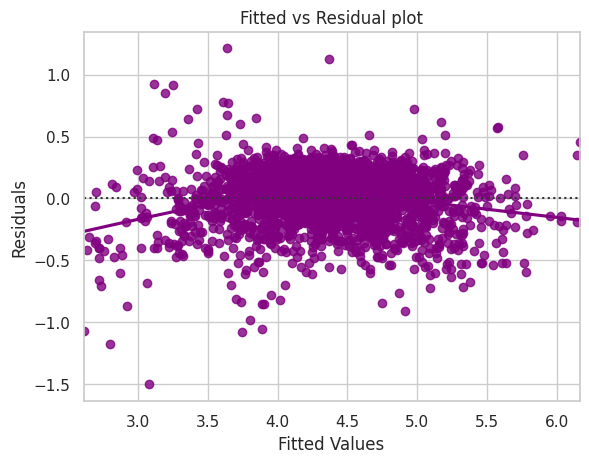

In [60]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Plotting the residuals against the predicted values we see a random scatter of points with no discernible pattern, which means our model's assumption of linearity is likely valid. In other words, the assumptions of linearity and independence are satisfied.

<Axes: xlabel='Residuals', ylabel='Count'>

Text(0.5, 1.0, 'Normality of residuals')

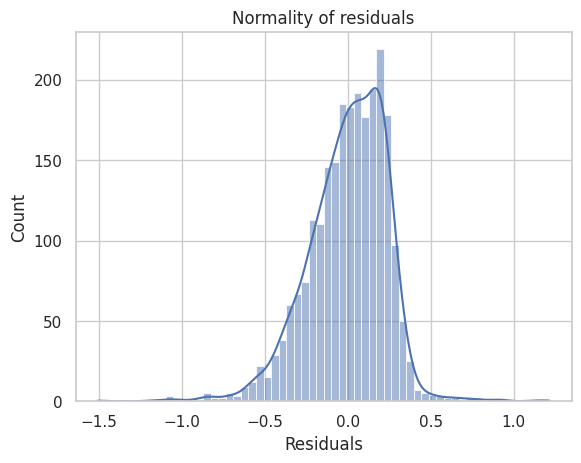

In [61]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

Normality of residuals fits our assumption of linear models

((array([-3.44206161, -3.19438596, -3.05720074, ...,  3.05720074,
          3.19438596,  3.44206161]),
  array([-1.5047548 , -1.18056766, -1.07810897, ...,  0.92295162,
          1.12902968,  1.21271504])),
 (0.2310197781542522, -1.735123944312624e-13, 0.9805229124957763))

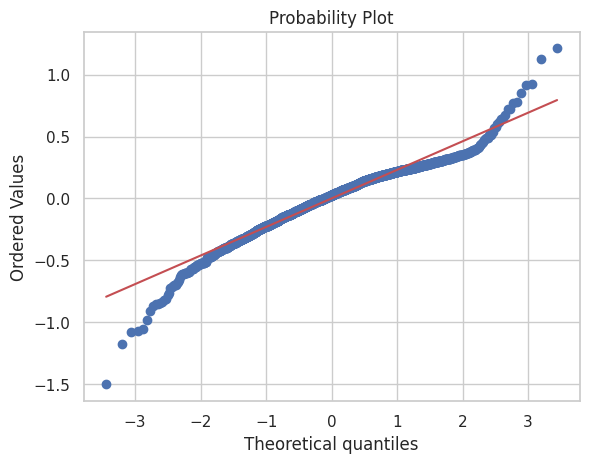

In [62]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The Q-Q plot compares the distribution of the residuals to a theoretical normal distribution. If the residuals follow a normal distribution, the points on the plot should fall approximately along a straight line. Deviations from the straight line, particularly at the ends, indicate departures from normality.

In [63]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9625352667208917, pvalue=1.8375323902181736e-24)

The p-value is extremely small (1.836e-24), which is far less than the typical significance level of 0.05. Therefore, we reject the null hypothesis and conclude that the data are not drawn from a normally distributed population.

homoscedacity

In [64]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.2118885774829689), ('p-value', 0.0004604251217353859)]

**Since p-value is not > 0.05, we can say that the residuals are not homoscedastic. So, this assumption is not satisfied.**Instead, we can claim heterosdacity. One solution is to transform the variables.

In [65]:
from scipy import stats
from scipy.stats import boxcox


# PTransforming the dependent variable
transformed_price, lambda_value = boxcox(df['normalized_used_price'])

# Update DataFrame with transformed variable
df['transformed_price'] = transformed_price

We decided against transforming the variables since our model is performing very well.

In [66]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1986,4.566741,4.389442
943,2.689886,3.235174
58,3.982295,4.145988
724,4.837709,4.690638
1657,4.245204,3.972026
725,4.137883,4.218761
1002,4.410007,4.271260
255,4.995319,4.967129
2639,5.100110,4.966362
1419,4.490320,4.151463


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Values')

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

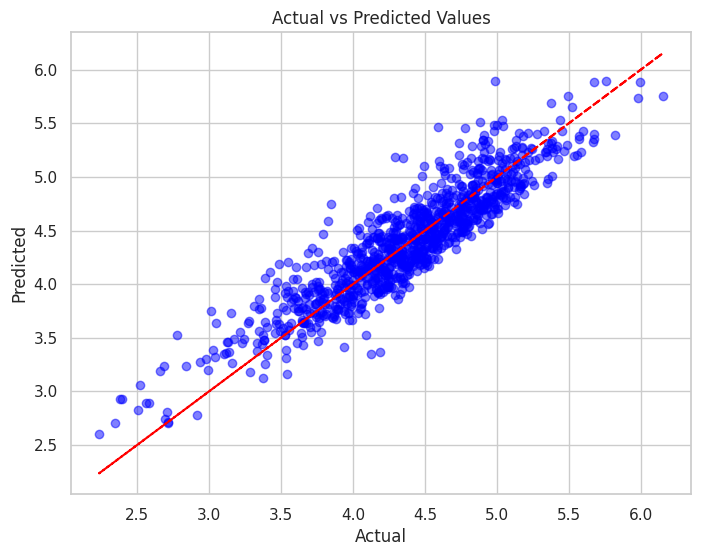

In [67]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pred_test["Actual"], df_pred_test["Predicted"], color='blue', alpha=0.5)

# Add labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add a diagonal  best fit line  for reference
plt.plot(df_pred_test["Actual"], df_pred_test["Actual"], color='red', linestyle='--')

# Show plot
plt.grid(True)
plt.show()

## Final Model

In [68]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [69]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1589.
Date:                   Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                           02:07:17   Log-Likelihood:                 67.056
No. Observations:                   2401   AIC:                            -116.1
Df Residuals:                       2392   BIC:                            -64.06
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235306,0.18196,0.841601,0.841005,4.415966


In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239038,0.18863,0.823656,0.822098,4.488579


RMSE (Root Mean Squared Error):
Training Performance: The RMSE on the training set is approximately 0.2353. This indicates that, on average, the model's predictions on the training data are off by about 0.2353 units.
Test Performance: The RMSE on the test set is approximately 0.2390. This indicates that, on average, the model's predictions on the test data are off by about 0.2390 units.
Interpretation: Both the training and test RMSE values are close to each other, suggesting that the model's performance is consistent across both datasets. Lower RMSE values indicate better predictive performance.
MAE (Mean Absolute Error):
Training Performance: The MAE on the training set is approximately 0.1820. This indicates that, on average, the absolute difference between the model's predictions and the actual values on the training data is about 0.1820 units.
Test Performance: The MAE on the test set is approximately 0.1886. This indicates that, on average, the absolute difference between the model's predictions and the actual values on the test data is about 0.1886 units.
Interpretation: Similar to RMSE, both the training and test MAE values are close to each other, suggesting consistent performance across datasets. Lower MAE values indicate better predictive performance.
R-squared:
Training Performance: The R-squared value on the training set is approximately 0.8416. This indicates that approximately 84.16% of the variance in the dependent variable (target) is explained by the independent variables (features) in the model.
Test Performance: The R-squared value on the test set is approximately 0.8237. This indicates that approximately 82.37% of the variance in the dependent variable is explained by the independent variables in the model.
Interpretation: Both the training and test R-squared values are relatively high, indicating that the model explains a significant portion of the variance in the target variable. Higher R-squared values suggest better model fit.
Adjusted R-squared:
Training Performance: The adjusted R-squared value on the training set is approximately 0.8410. This is a modified version of R-squared that adjusts for the number of predictors in the model.
Test Performance: The adjusted R-squared value on the test set is approximately 0.8221.
Interpretation: Adjusted R-squared penalizes the addition of unnecessary predictors to the model, providing a more accurate measure of model fit. Similar to R-squared, higher values indicate better model fit.
MAPE (Mean Absolute Percentage Error):
Training Performance: The MAPE on the training set is approximately 4.416%. This indicates that, on average, the absolute percentage difference between the model's predictions and the actual values on the training data is about 4.416%.
Test Performance: The MAPE on the test set is approximately 4.489%. This indicates that, on average, the absolute percentage difference between the model's predictions and the actual values on the test data is about 4.489%.
Interpretation: Lower MAPE values indicate better predictive accuracy, as they represent a smaller average percentage error between predicted and actual values.

## Actionable Insights and Recommendations

Since Linear Regression  can be seen as very tedious, we do suggest other methods that may be less actionable and just as consise. We do believe our model acts very well compared to predicted values and we have confidence that the model does a great job predicting the price of phones in the used market. Our only recomendations is to double check values of our outlier phones, to make sure they are accurate.


In [73]:
#%%shell
#jupyter nbconvert --to html /content/SLF_Project_LearnerNotebook_FullCode.ipynb

___